# Insurance Claim Model


© Explore AI

# By Ogunmola Philip



### Project Description

The aim of this project is to predict the total claim amount per exposure, for specific risk profiles. A risk profile describes a policyholder (someone who is a client and owns a policy at the insurer), things like age, gender, marital status, etc. These attributes can all be found in the dataset used in this project. The reason for doing this is so that the predicted claim can be used to calculate a premium for new applicants, based on their predicted risk. This way the insurer maximizes profits by charging higher premiums for higher risk profiles. It is important to consider however that accompanying a higher premium, the insurer should maintain sensibility in deciding on a premium and still outcompete competitor insurers, which make business rules essential. 


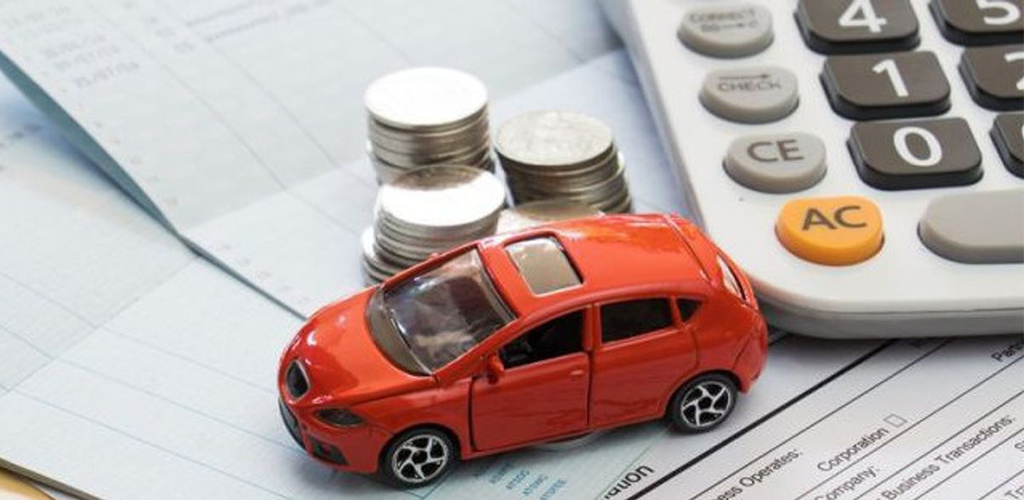

# Outline
This challenge is structured as follows:

- Loading Data
- Data Preprocessing
- Expolatory Data Analysis
- Features Engineering
- Modelling and Hyperparameter tuning.

# Importing Packages

In [401]:
# Libraries for data loading, data manipulation and data visulisation
import numpy as np # for linear algebra
import pandas as pd # data processing, excel file importation

import matplotlib.pyplot as plt
from statsmodels.graphics.correlation import plot_corr
import seaborn as sns
from datetime import datetime
from time import time
%matplotlib inline

from sklearn.preprocessing import Binarizer
from sklearn.preprocessing import KBinsDiscretizer
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split

import pickle
from sklearn.linear_model import LinearRegression 
import xgboost as xgb
from xgboost import XGBRegressor
from warnings import filterwarnings
from sklearn import ensemble
from sklearn.neighbors import LocalOutlierFactor
import statsmodels.api as sm
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error, mean_absolute_percentage_error


C:\Users\DELL\anaconda3copy\lib\site-packages\statsmodels\tsa\base\tsa_model.py:7: FutureWarning:

pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.

C:\Users\DELL\anaconda3copy\lib\site-packages\statsmodels\tsa\base\tsa_model.py:7: FutureWarning:

pandas.Float64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.



# Loading Data

In [2]:
# Read the dataset
df = pd.read_excel('DataSet.xlsx')

In [3]:
# Display entire columns of the dataset
pd.set_option("display.max.columns", None) 

In [4]:
# Display the dataset
df.head()

PolicyId  ClaimId   SumTotalClaimAmount  CountTotalClaimAmount  PremiumSum  \
0  10806273       NaN                  NaN                    NaN     4915.98   
1  10822247       NaN                  NaN                    NaN     3342.60   
2  10941976       NaN                  NaN                    NaN     1762.54   
3  10782539       NaN                  NaN                    NaN     3723.60   
4  10916477       NaN                  NaN                    NaN     2478.72   

   CasePremiumSum PaymentDueDate  TotalPremiumPaymentCount  \
0         4369.76     2021-12-29                       8.0   
1          668.52     2020-09-30                       1.0   
2         1762.54     2022-07-28                       3.0   
3         3723.60     2021-08-31                       5.0   
4            0.00     2022-03-31                       0.0   

   PreviousInsurerExcess  PreviousInsurerPremium      EmploymentType  \
0                    0.0                     0.0           Permanent   
1                 4500.0                   900.0           Permanent   
2                    0.0                   808.0           Permanent   
3                    0.0                     0.0  Temporary / Casual   
4                    0.0                     0.0           Permanent   

   IsMemberPayer Employer                 Occupation  \
0              1      NaN  Human Resource Consultant   
1              1      NaN                   Sale Rep   
2              1      NaN             Safety Officer   
3              1      NaN       Cic support engineer   
4              1      NaN       Correctional Officer   

                  IndustryType  Gender    BirthDt MaritalStatus        Make  \
0  Office / Clerical / Manager  Female 1966-11-22        Single  VOLKSWAGEN   
1                   Government    Male 1992-08-31        Single  VOLKSWAGEN   
2  Office / Clerical / Manager  Female 1989-08-14        Single  VOLKSWAGEN   
3                        Other  Female 1991-02-17        Single         KIA   
4                   Government    Male 1976-01-23        Single         BMW   

                              Model  Colour Transmission VehicleType BodyType  \
0                          POLO 1.4    grey            M        Auto      H/B   
1  POLO VIVO GP 1.4 CONCEPTLINE 5DR  silver            M        Auto      H/B   
2                 POLO VIVO 1.4 5Dr   white            M        Auto      H/B   
3                       RIO 1.2 5DR   white            M        Auto      H/B   
4                320i M SPORT (F30)    blue            M        Auto      S/D   

   CubicCapacity  Cyl  Kilowatts  VehicleYear PolicyMainDriverAnnualMileage  \
0         1390.0  4.0       62.0       2005.0                      <5000 km   
1         1398.0  4.0       55.0       2015.0                     15000+ km   
2         1398.0  4.0       55.0       2014.0               5000 to 9999 km   
3         1248.0  4.0       62.0       2017.0                     15000+ km   
4         1998.0  4.0      135.0       2015.0                      <5000 km   

  PolicyMainDriverLicenseDurationRange PersonProvince            Area  \
0                            15+ years  KWAZULU-NATAL   Dolphin Coast   
1                        6 to 11 years        GAUTENG        PRETORIA   
2                        6 to 11 years     MPUMALANGA        PRETORIA   
3                         1 to 6 years        GAUTENG        NOORDWYK   
4                            15+ years   EASTERN CAPE             NaN   

   MonthsSinceInception  DaysSinceInception PolicyStatus CommencementDt  \
0                  23.0               723.0    Cancelled     2020-01-06   
1                   5.0               151.0       Lapsed     2020-05-18   
2                   NaN                 NaN       Active     2022-05-30   
3                  26.0               800.0    Cancelled     2019-07-18   
4                   3.0                96.0       Lapsed     2022-01-10   

                 PolicyEndDate  SumAssured   M

**Observations:**
* The dataset contains a lot of columns
* The there are lots of Null values in the dataset 

In [5]:
df.columns # Outline the columns

Index([                            'PolicyId',
                                   'ClaimId ',
                        'SumTotalClaimAmount',
                      'CountTotalClaimAmount',
                                 'PremiumSum',
                             'CasePremiumSum',
                             'PaymentDueDate',
                   'TotalPremiumPaymentCount',
                      'PreviousInsurerExcess',
                     'PreviousInsurerPremium',
                             'EmploymentType',
                              'IsMemberPayer',
                                   'Employer',
                                 'Occupation',
                               'IndustryType',
                                     'Gender',
                                    'BirthDt',
                              'MaritalStatus',
                                       'Make',
                                      'Model',
                                     'Colour',
             

In [6]:
df.shape

(262990, 45)

**Observations:**
* 45 Columns
* 262990 Rows

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 262990 entries, 0 to 262989
Data columns (total 45 columns):
 #   Column                                Non-Null Count   Dtype         
---  ------                                --------------   -----         
 0   PolicyId                              262990 non-null  int64         
 1   ClaimId                               27478 non-null   float64       
 2   SumTotalClaimAmount                   27392 non-null   float64       
 3   CountTotalClaimAmount                 27478 non-null   float64       
 4   PremiumSum                            262750 non-null  float64       
 5   CasePremiumSum                        262750 non-null  float64       
 6   PaymentDueDate                        262750 non-null  datetime64[ns]
 7   TotalPremiumPaymentCount              262750 non-null  float64       
 8   PreviousInsurerExcess                 262963 non-null  float64       
 9   PreviousInsurerPremium                262961 non-null  floa

In [8]:
df.isnull().sum()

PolicyId                                     0
ClaimId                                 235512
SumTotalClaimAmount                     235598
CountTotalClaimAmount                   235512
PremiumSum                                 240
CasePremiumSum                             240
PaymentDueDate                             240
TotalPremiumPaymentCount                   240
PreviousInsurerExcess                       27
PreviousInsurerPremium                      29
EmploymentType                            2656
IsMemberPayer                                0
Employer                                255704
Occupation                                2246
IndustryType                              4131
Gender                                       8
BirthDt                                      6
MaritalStatus                                6
Make                                         6
Model                                        6
Colour                                       6
Transmission 

**Observations:**
* Lots of null entries in some columns, this might require us to drop some columns

In [9]:
df.describe().T

count          mean           std  \
PolicyId                      262990.0  1.084961e+07  51720.661654   
ClaimId                        27478.0  1.010507e+07  15069.963591   
SumTotalClaimAmount            27392.0  4.059307e+04  65213.503869   
CountTotalClaimAmount          27478.0  1.256787e+00      0.574605   
PremiumSum                    262750.0  4.589583e+03   3538.634556   
CasePremiumSum                262750.0  3.709207e+03   3718.507791   
TotalPremiumPaymentCount      262750.0  4.623604e+00      4.066673   
PreviousInsurerExcess         262963.0  2.923134e+03   6031.299346   
PreviousInsurerPremium        262961.0  5.767832e+02    654.862704   
IsMemberPayer                 262990.0  9.662154e-01      0.180675   
CubicCapacity                 262984.0  1.538541e+03    495.382261   
Cyl                           262984.0  3.856923e+00      0.528058   
Kilowatts                     262984.0  8.312799e+01     31.377326   
VehicleYear                   262984.0  2.015282e+03      3.892903   
MonthsSinceInception          134794.0  9.912296e+00      8.364164   
DaysSinceInception            134794.0  3.014122e+02    254.927877   
SumAssured                    220932.0  1.594538e+05  73006.555795   
MeanExcess                    262984.0  5.333199e+03   1713.991262   
TotalExcess                   262984.0  2.724759e+04  12593.858000   
ExcessTypesCount              262984.0  5.023975e+00      1.729189   
BaseExcess                    262984.0  4.612811e+03   2135.059052   
NomimatedDriversCount         262984.0  5.468279e-01      0.725453   
NomimatedDriversUnder30Count  262984.0  1.035842e-01      0.337488   
0.5865768182345752            262990.0  4.992618e-01      0.288742   

                                       min           25%           50%  \
PolicyId                      1.076784e+07  1.080422e+07  1.084769e+07   
ClaimId                       1.007378e+07  1.009240e+07  1.010566e+07   
SumTotalClaimAmount           0.000000e+00  3.415500e+03  1.391817e+04   
CountTotalClaimAmount         0.000000e+00  1.000000e+00  1.000000e+00   
PremiumSum                    0.000000e+00  1.988050e+03  3.568235e+03   
CasePremiumSum                0.000000e+00  7.191375e+02  2.743360e+03   
TotalPremiumPaymentCount      0.000000e+00  1.000000e+00  4.000000e+00   
PreviousInsurerExcess        -1.000000e+00  0.000000e+00  0.000000e+00   
PreviousInsurerPremium       -1.700000e+03  0.000000e+00  4.580000e+02   
IsMemberPayer                 0.000000e+00  1.000000e+00  1.000000e+00   
CubicCapacity                 0.000000e+00  1.198000e+03  1.398000e+03   
Cyl                           0.000000e+00  4.000000e+00  4.000000e+00   
Kilowatts                     0.000000e+00  6.300000e+01  7.400000e+01   
VehicleYear                   2.004000e+03  2.013000e+03  2.016000e+03   
MonthsSinceInception         -2.000000e+00  4.000000e+00  7.000000e+00   
DaysSinceInception           -5.100000e+01  1.170000e+02  2.030000e+02   
SumAssured                    3.000000e+04  1.100000e+05  1.478000e+05   
MeanExcess                    0.000000e+00  4.210000e+03  5.000000e+03   
TotalExcess                   0.000000e+00  2.200000e+04  2.727000e+04   
ExcessTypesCount              1.000000e+00  4.000000e+00  6.000000e+00   
BaseExcess                    0.000000e+00  4.000000e+03  5.000000e+03   
NomimatedDriversCount         0.000000e+00  0.000000e+00  0.000000e+00   
NomimatedDriversUnder30Count  0.000000e+00  0.000000e+00  0.000000e+00   
0.5865768182345752            3.051541e-06  2.490548e-01  4.990498e-01   

                                       75%           max  
PolicyId                      1.089272e+07  1.095790e+07  
ClaimId                       1.011831e+07  1.012987e+07  
SumTotalClaimAmount           4.461965e+04  1.754000e+06  
CountTotalClaimAmount         1.000000e+00  9.000000e+00  
PremiumSum                    6.351193e+03  4.182255e+04  
CasePremiumSum                5.620938e+03  4.182255e+04  
TotalPremiumPaymen

**Observations:**
* The mean of the claim amount is more than the standard deviation, This suggests That its not a normal distribution

## Features Summary

In [10]:
df1 = df.copy()
df1['sum_freq_by_count']= df1['SumTotalClaimAmount'] * df1['CountTotalClaimAmount']
mean_of_df1=df1['sum_freq_by_count'].sum()/df1['CountTotalClaimAmount'].sum()
df1['variance']= df1['sum_freq_by_count']-mean_of_df1
df1['variance*2']= df1['variance']*2

data_dict= {
    "No_of_policy": df1.shape[0]- df1['PolicyId'].isna().sum(),
    "Claim ID Count": df1.shape[0]- df1['ClaimId '].isna().sum(),
    "Ratio of Claims to Every Policy Holder": f"{df1.shape[0]- df1['ClaimId '].isna().sum()} : {(df1.shape[0]- df1['PolicyId'].isna().sum())}",
    "Average Claim Amount": round((df1['sum_freq_by_count'].sum()/df1['CountTotalClaimAmount'].sum()),2),
    "Average Count of Claim Amount": round((df1['CountTotalClaimAmount'].mean()),2),
    "Standard Deviation of Claim Amount": round(((df1['variance*2'].sum()/df1['CountTotalClaimAmount'].sum())*0.5),2),
}

In [11]:
data_dict

{'No_of_policy': 262990,
 'Claim ID Count': 27478,
 'Ratio of Claims to Every Policy Holder': '27478 : 262990',
 'Average Claim Amount': 48191.09,
 'Average Count of Claim Amount': 1.26,
 'Standard Deviation of Claim Amount': 9966.43}

In [12]:
df_summary = pd.DataFrame(data_dict, index = [i for i in range(1)])

In [13]:
df_summary.T

0
No_of_policy                                    262990
Claim ID Count                                   27478
Ratio of Claims to Every Policy Holder  27478 : 262990
Average Claim Amount                          48191.09
Average Count of Claim Amount                     1.26
Standard Deviation of Claim Amount             9966.43

**Observations:**
* From the feature summary, one can deduce that it is a poisson distribution comparing the claims to policy ID

# Data preprocessing

* Drop the last column
* Rename columns
* Drop all premium features aside from PreviousInsurerPremium because we shouldn't know the current premium and payment record
* Replace Nan with 0 on the ClaimAmount and ClaimCount columns
* Create age column from BirthDt column

In [14]:
#Drop the last column
df_prep = df.iloc[: , :-1]

In [15]:
# Rename columns
df_prep.rename(columns = {'SumTotalClaimAmount':'ClaimAmount', 'CountTotalClaimAmount':'ClaimCount'}, inplace = True)

In [16]:
df_prep = df_prep.drop(['PremiumSum', 'CasePremiumSum','PaymentDueDate','TotalPremiumPaymentCount'], axis=1)

In [17]:
# Replace NaN values for 'SumTotalClaimAmount' and 'CountTotalClaimAmount' columns
df_prep['ClaimAmount'].fillna(0, inplace=True)
df_prep['ClaimCount'].fillna(0, inplace=True)

In [18]:
# create Age column from the BirthDt column

now = pd.Timestamp('now')
df_prep['BirthDt'] = pd.to_datetime(df['BirthDt'], format='%y-%m-%d')    # 1
df_prep['BirthDt'] = df['BirthDt'].where(df['BirthDt'] < now, df_prep['BirthDt'] -  np.timedelta64(100, 'Y'))   # 2
df_prep['age'] = (now - df['BirthDt']).astype('<m8[Y]')   # 3

# Drop BirthDt column
df_prep = df_prep.drop(['BirthDt'], axis=1) 

# Binary Indicator if there was a claim or not
df_prep['InsuranceClaim'] = np.where(df_prep['ClaimAmount'] > 0, 'Yes', 'No') 

df_prep.head()

PolicyId  ClaimId   ClaimAmount  ClaimCount  PreviousInsurerExcess  \
0  10806273       NaN          0.0         0.0                    0.0   
1  10822247       NaN          0.0         0.0                 4500.0   
2  10941976       NaN          0.0         0.0                    0.0   
3  10782539       NaN          0.0         0.0                    0.0   
4  10916477       NaN          0.0         0.0                    0.0   

   PreviousInsurerPremium      EmploymentType  IsMemberPayer Employer  \
0                     0.0           Permanent              1      NaN   
1                   900.0           Permanent              1      NaN   
2                   808.0           Permanent              1      NaN   
3                     0.0  Temporary / Casual              1      NaN   
4                     0.0           Permanent              1      NaN   

                  Occupation                 IndustryType  Gender  \
0  Human Resource Consultant  Office / Clerical / Manager  Female   
1                   Sale Rep                   Government    Male   
2             Safety Officer  Office / Clerical / Manager  Female   
3       Cic support engineer                        Other  Female   
4       Correctional Officer                   Government    Male   

  MaritalStatus        Make                             Model  Colour  \
0        Single  VOLKSWAGEN                          POLO 1.4    grey   
1        Single  VOLKSWAGEN  POLO VIVO GP 1.4 CONCEPTLINE 5DR  silver   
2        Single  VOLKSWAGEN                 POLO VIVO 1.4 5Dr   white   
3        Single         KIA                       RIO 1.2 5DR   white   
4        Single         BMW                320i M SPORT (F30)    blue   

  Transmission VehicleType BodyType  CubicCapacity  Cyl  Kilowatts  \
0            M        Auto      H/B         1390.0  4.0       62.0   
1            M        Auto      H/B         1398.0  4.0       55.0   
2            M        Auto      H/B         1398.0  4.0       55.0   
3            M        Auto      H/B         1248.0  4.0       62.0   
4            M        Auto      S/D         1998.0  4.0      135.0   

   VehicleYear PolicyMainDriverAnnualMileage  \
0       2005.0                      <5000 km   
1       2015.0                     15000+ km   
2       2014.0               5000 to 9999 km   
3       2017.0                     15000+ km   
4       2015.0                      <5000 km   

  PolicyMainDriverLicenseDurationRange PersonProvince            Area  \
0                            15+ years  KWAZULU-NATAL   Dolphin Coast   
1                        6 to 11 years        GAUTENG        PRETORIA   
2                        6 to 11 years     MPUMALANGA        PRETORIA   
3                         1 to 6 years        GAUTENG        NOORDWYK   
4                            15+ years   EASTERN CAPE             NaN   

   MonthsSinceInception  DaysSinceInception PolicyStatus CommencementDt  \
0                  23.0               723.0    Cancelled     2020-01-06   
1                   5.0               151.0       Lapsed     2020-05-18   
2                   NaN                 NaN       Active     2022-05-30   
3                  26.0               800.0    Cancelled     2019-07-18   
4                   3.0                96.0       Lapsed     2022-01-10   

                 PolicyEndDate  SumAssured   MeanExcess  TotalExcess  \
0  2021-12-29 14:46:25.4847000     45700.0  3166.666666      19000.0   
1  2020-10-16 00:00:44.0122000    113100.0  4500.000000       9000.0   
2                          NaN     92900.0  3333.333333      20000.0   
3  2021-09-25 14:09:25.7650000    173800.0  5720.000000      34320.0   
4  2022-04-16 00:02:41.8644000    240200.0  6286.666666      37720.0   

   ExcessTypesCount  BaseExcess  NomimatedDriversCount  \
0               6.0      1000.0                    2.0   
1               2.0      5000.0                    1.0   
2               6.0      1000.0                    0.0   
3     

# Exploratory Data Analysis

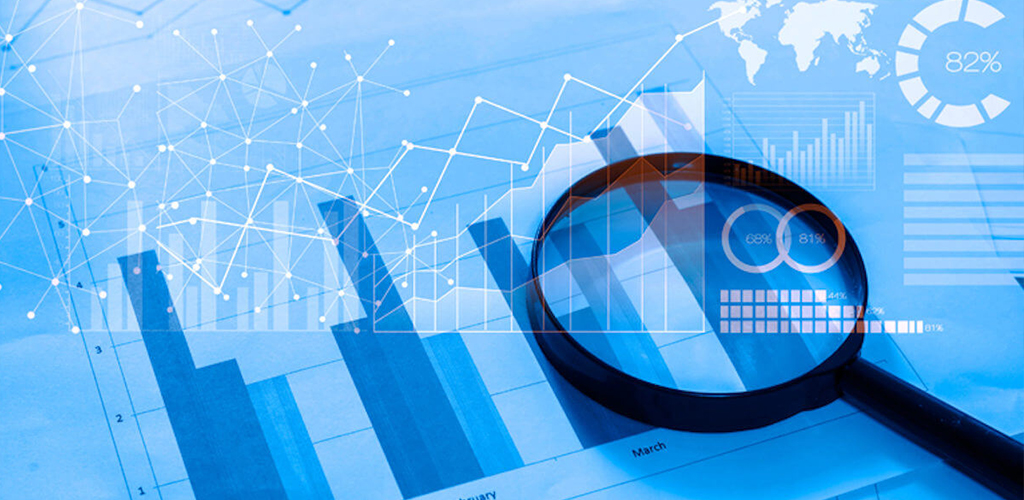

## Features Correlation

In [19]:
df_prep.corr() 

PolicyId  ClaimId   ClaimAmount  ClaimCount  \
PolicyId                      1.000000  0.674319    -0.042590   -0.095975   
ClaimId                       0.674319  1.000000    -0.007204    0.027355   
ClaimAmount                  -0.042590 -0.007204     1.000000    0.553535   
ClaimCount                   -0.095975  0.027355     0.553535    1.000000   
PreviousInsurerExcess        -0.014394 -0.015826     0.016626    0.013259   
PreviousInsurerPremium       -0.045854 -0.042123     0.025488    0.028129   
IsMemberPayer                -0.024764 -0.025404     0.002995    0.005359   
CubicCapacity                -0.021576  0.002193    -0.011273   -0.018159   
Cyl                          -0.046390 -0.019562    -0.015999   -0.018181   
Kilowatts                    -0.008094 -0.001576     0.008464    0.009737   
VehicleYear                   0.169925  0.096609     0.054234    0.034545   
MonthsSinceInception         -0.450538 -0.016954     0.026448    0.158876   
DaysSinceInception           -0.453100 -0.021405     0.026788    0.160093   
SumAssured                    0.065627  0.038429     0.058844    0.045395   
MeanExcess                    0.105844  0.055201     0.058158    0.053107   
TotalExcess                   0.396211  0.413176     0.013615    0.054557   
ExcessTypesCount              0.498567  0.611641    -0.041177    0.025593   
BaseExcess                    0.134392  0.093471     0.018144   -0.020909   
NomimatedDriversCount        -0.187614 -0.082379    -0.001243    0.023299   
NomimatedDriversUnder30Count -0.106212 -0.066292     0.011733    0.027678   
age                           0.069184  0.126269    -0.046540   -0.054068   

                              PreviousInsurerExcess  PreviousInsurerPremium  \
PolicyId                                  -0.014394               -0.045854   
ClaimId                                   -0.015826               -0.042123   
ClaimAmount                                0.016626                0.025488   
ClaimCount                                 0.013259                0.028129   
PreviousInsurerExcess                      1.000000                0.442726   
PreviousInsurerPremium                     0.442726                1.000000   
IsMemberPayer                              0.026939                0.045403   
CubicCapacity                             -0.062386               -0.054820   
Cyl                                       -0.054648               -0.062145   
Kilowatts                                 -0.025591                0.020394   
VehicleYear                                0.147769                0.241129   
MonthsSinceInception                       0.011308                0.017792   
DaysSinceInception                         0.011492                0.018161   
SumAssured                                 0.117590                0.279245   
MeanExcess                                 0.120901                0.169071   
TotalExcess                                0.081235                0.114564   
ExcessTypesCount                          -0.013035               -0.036698   
BaseExcess                                 0.083602                0.002855   
NomimatedDriversCount                     -0.041376               -0.039142   
NomimatedDriversUnder30Count              -0.010484               -0.016626   
age                                       -0.126419               -0.152422   

                              IsMemberPayer  CubicCapacity       Cyl  \
PolicyId                          -0.024764      -0.021576 -0.046390   
ClaimId                           -0.025404       0.002193 -0.019562   
ClaimAmount                        0.002995      -0.011273 -0.015999   
ClaimCount                         0.005359      -0.018159 -0.018181   
PreviousInsurerExcess              0.026939      -0.062386 -0.054648   
PreviousInsurerPremium             0.045403      -0.054820 -0.062145   
IsMemberPayer                      1.000000      -0.015671 -0.007861   
CubicCapacity       

<AxesSubplot:>

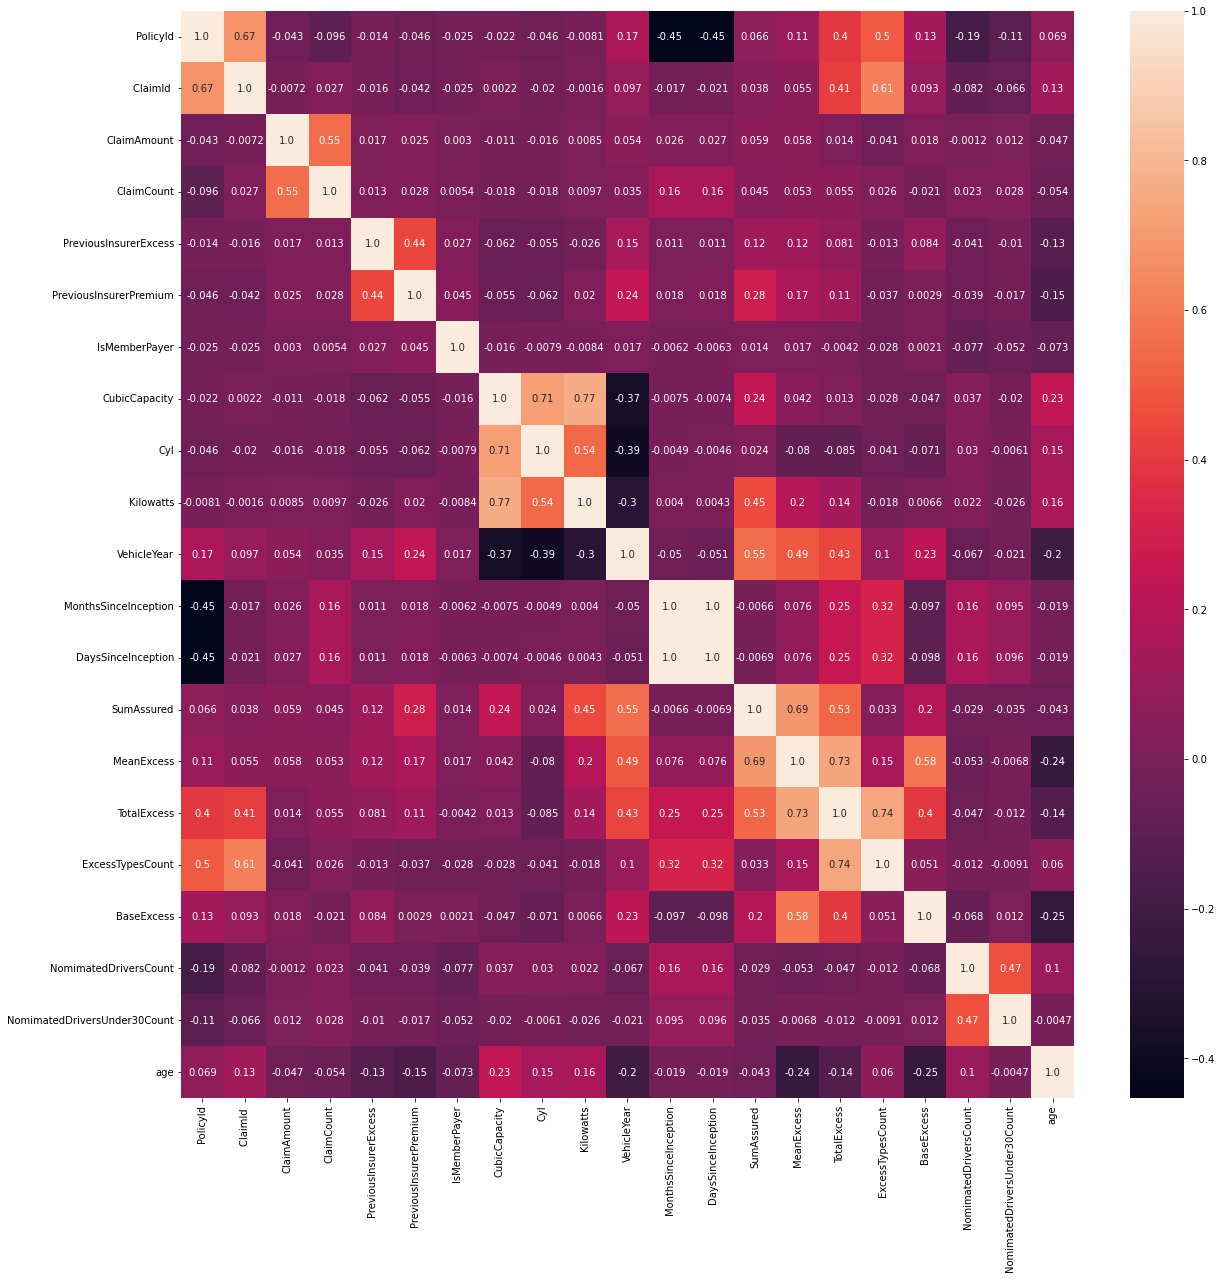

In [20]:
plt.figure(figsize=(20,20))
sns.heatmap(df_prep.corr(), annot=True, fmt=".2")

# Numerical Features Distribution

From feature summary I noticed that the Standard deviation was more that the the mean, this clearly shows that it is not a normal distribution. Here is the visuals of the distribution of the numerical variables.

In [21]:
df_prep.columns

Index(['PolicyId', 'ClaimId ', 'ClaimAmount', 'ClaimCount',
       'PreviousInsurerExcess', 'PreviousInsurerPremium', 'EmploymentType',
       'IsMemberPayer', 'Employer', 'Occupation', 'IndustryType', 'Gender',
       'MaritalStatus', 'Make', 'Model', 'Colour', 'Transmission',
       'VehicleType', 'BodyType', 'CubicCapacity', 'Cyl', 'Kilowatts',
       'VehicleYear', 'PolicyMainDriverAnnualMileage',
       'PolicyMainDriverLicenseDurationRange', 'PersonProvince', 'Area',
       'MonthsSinceInception', 'DaysSinceInception', 'PolicyStatus',
       'CommencementDt', 'PolicyEndDate', 'SumAssured', 'MeanExcess',
       'TotalExcess', 'ExcessTypesCount', 'BaseExcess',
       'NomimatedDriversCount', 'NomimatedDriversUnder30Count', 'age',
       'InsuranceClaim'],
      dtype='object')

In [22]:
# Drop categorical and some irrelevant features
num_var = df_prep.drop(["InsuranceClaim", "PolicyId", "ClaimId ", "EmploymentType", "IsMemberPayer",\
                   "Employer", "Occupation", "IndustryType", "Gender", "MaritalStatus", "Make",\
                   "Model", "Colour", "Transmission", "VehicleType", "BodyType",\
                   "PolicyMainDriverLicenseDurationRange", "PersonProvince", "Area",\
                   "MonthsSinceInception", "DaysSinceInception", "PolicyStatus",\
                   "CommencementDt", "PolicyEndDate", "MeanExcess", "ExcessTypesCount",\
                   "BaseExcess", "NomimatedDriversCount", "NomimatedDriversUnder30Count", 'CubicCapacity',\
                    "PolicyMainDriverAnnualMileage"], axis=1).columns

In [23]:
num_var

Index(['ClaimAmount', 'ClaimCount', 'PreviousInsurerExcess',
       'PreviousInsurerPremium', 'Cyl', 'Kilowatts', 'VehicleYear',
       'SumAssured', 'TotalExcess', 'age'],
      dtype='object')

C:\Users\DELL\anaconda3copy\lib\site-packages\seaborn\distributions.py:316: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  warnings.warn(msg, UserWarning)


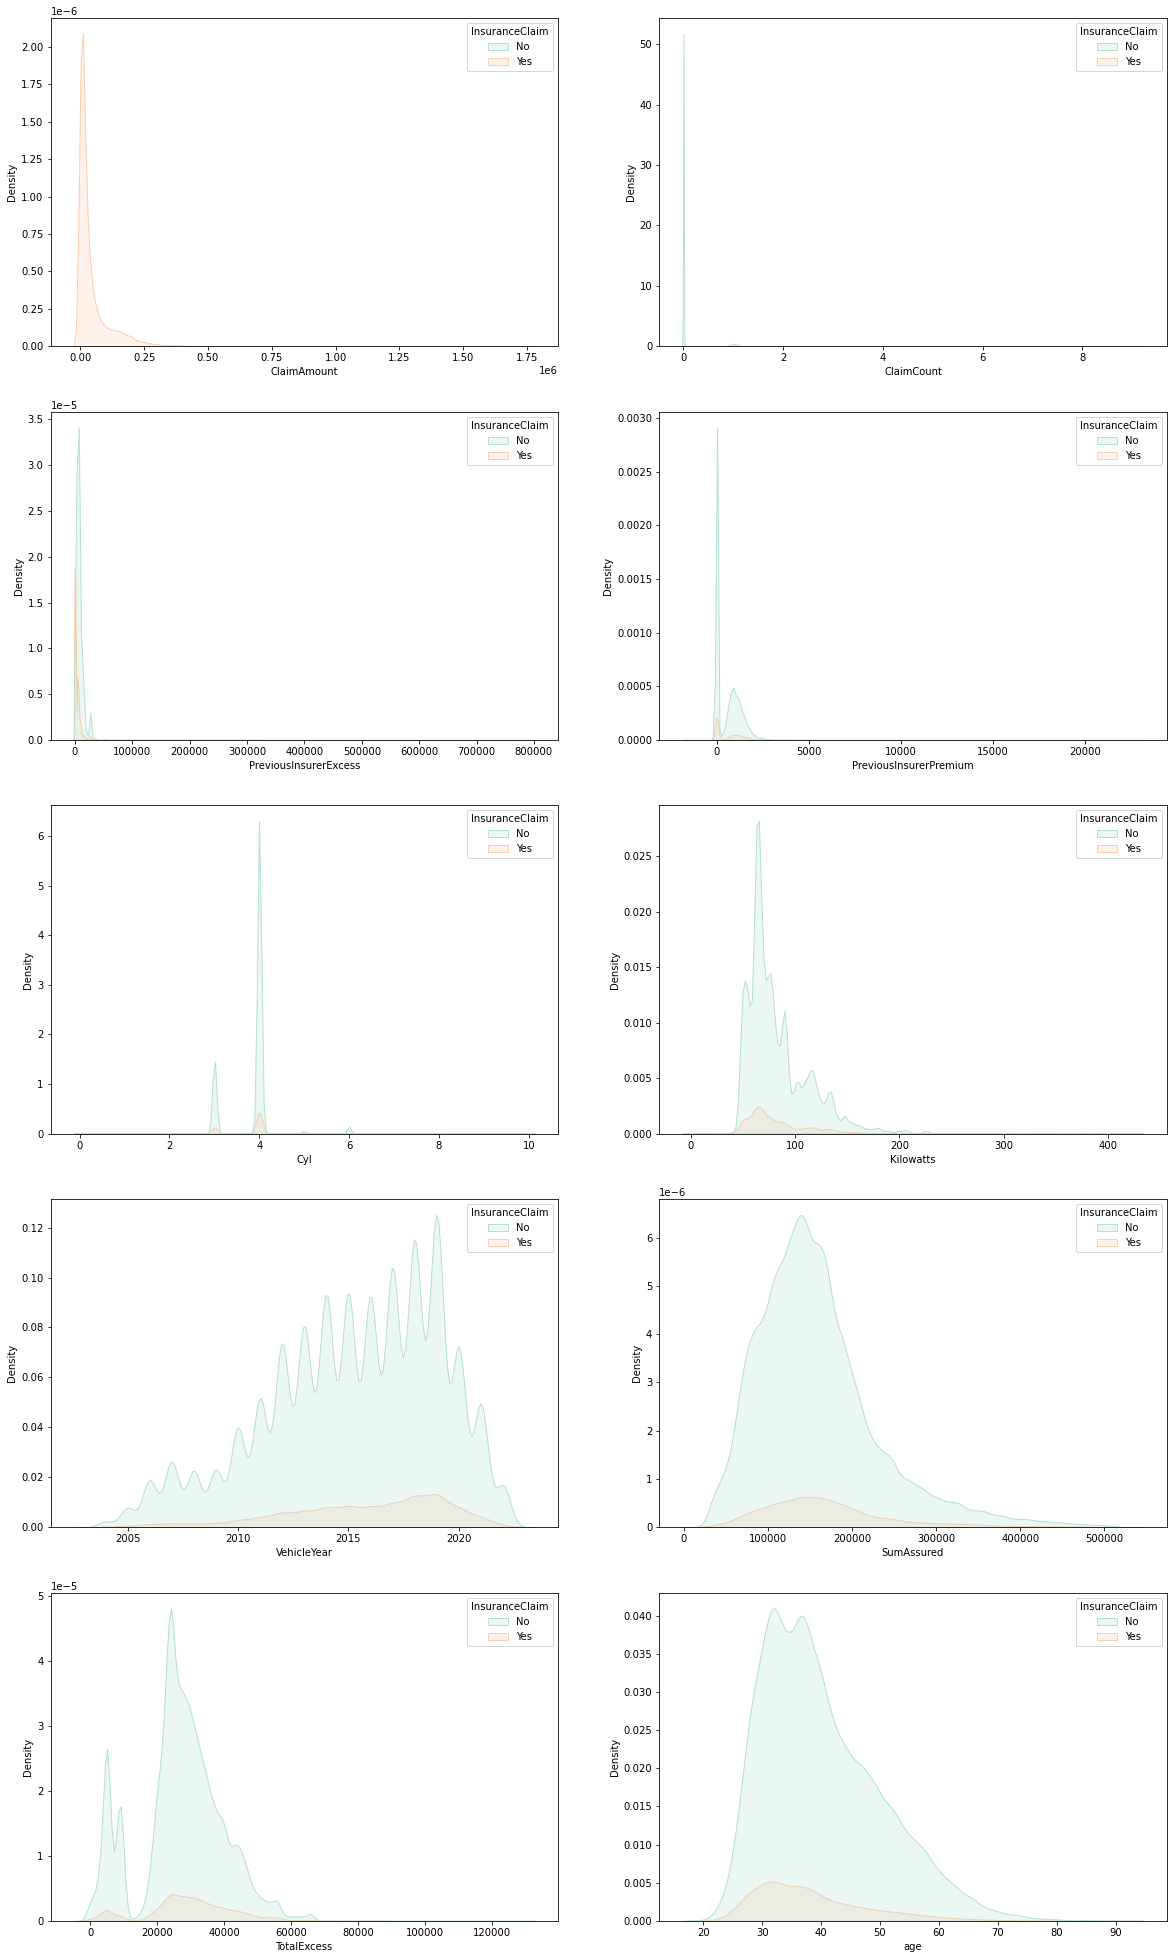

In [24]:
# plot the density distribution of numerical variables, considerings those that claimed and those that did not
fig, axes = plt.subplots(5, 2, figsize=(20,35))
for i in range(len(num_var)):
    ax = axes[int(i/2), i%2]
    sns.kdeplot(data=df_prep, x=num_var[i], hue="InsuranceClaim", fill=True, palette="Pastel2", ax=ax)

**Observations:**
* The claim amount only displays the times where there was a claim, majority of claim amount, was 0 indicating that most Policy   holders claimed nothing, displaying a Poisson distribution.
* The majority of the claim count was at 0 indicating that majority of policy holders were not claiming
* The vehicle year shows a positive distribution density, as the year increases, the density of claim amount increases too,       meaning there was either more claim amount or claim count among policy holders that claimed. until about 2019, when the count   of Zero claims increases 
* When the sum assured was between 100,000 Rands and 200,000 Rands, there was a higher density of claim amount among policy       holders that claimed.
* Among policy holders that claimed, the total excess that got the highest density of claim amount is about 25,000 Rands
* The age with the highest claim amount density is about 30 years. as policy holders grow older, the claim amount density         starts to drop
* The Kilowatts with the highest claim amount is less than 100KW, from the heu of policy holders that do not claim, I can         deduce that it is so because a lot of policy holders operated at Kilowatts less than 100KW

In [25]:
df_num_var = df_prep[['ClaimAmount', 'ClaimCount', 'PreviousInsurerExcess', 'PreviousInsurerPremium', 'Cyl',\
                      'Kilowatts', 'VehicleYear', 'SumAssured', 'TotalExcess', 'age', 'InsuranceClaim']]

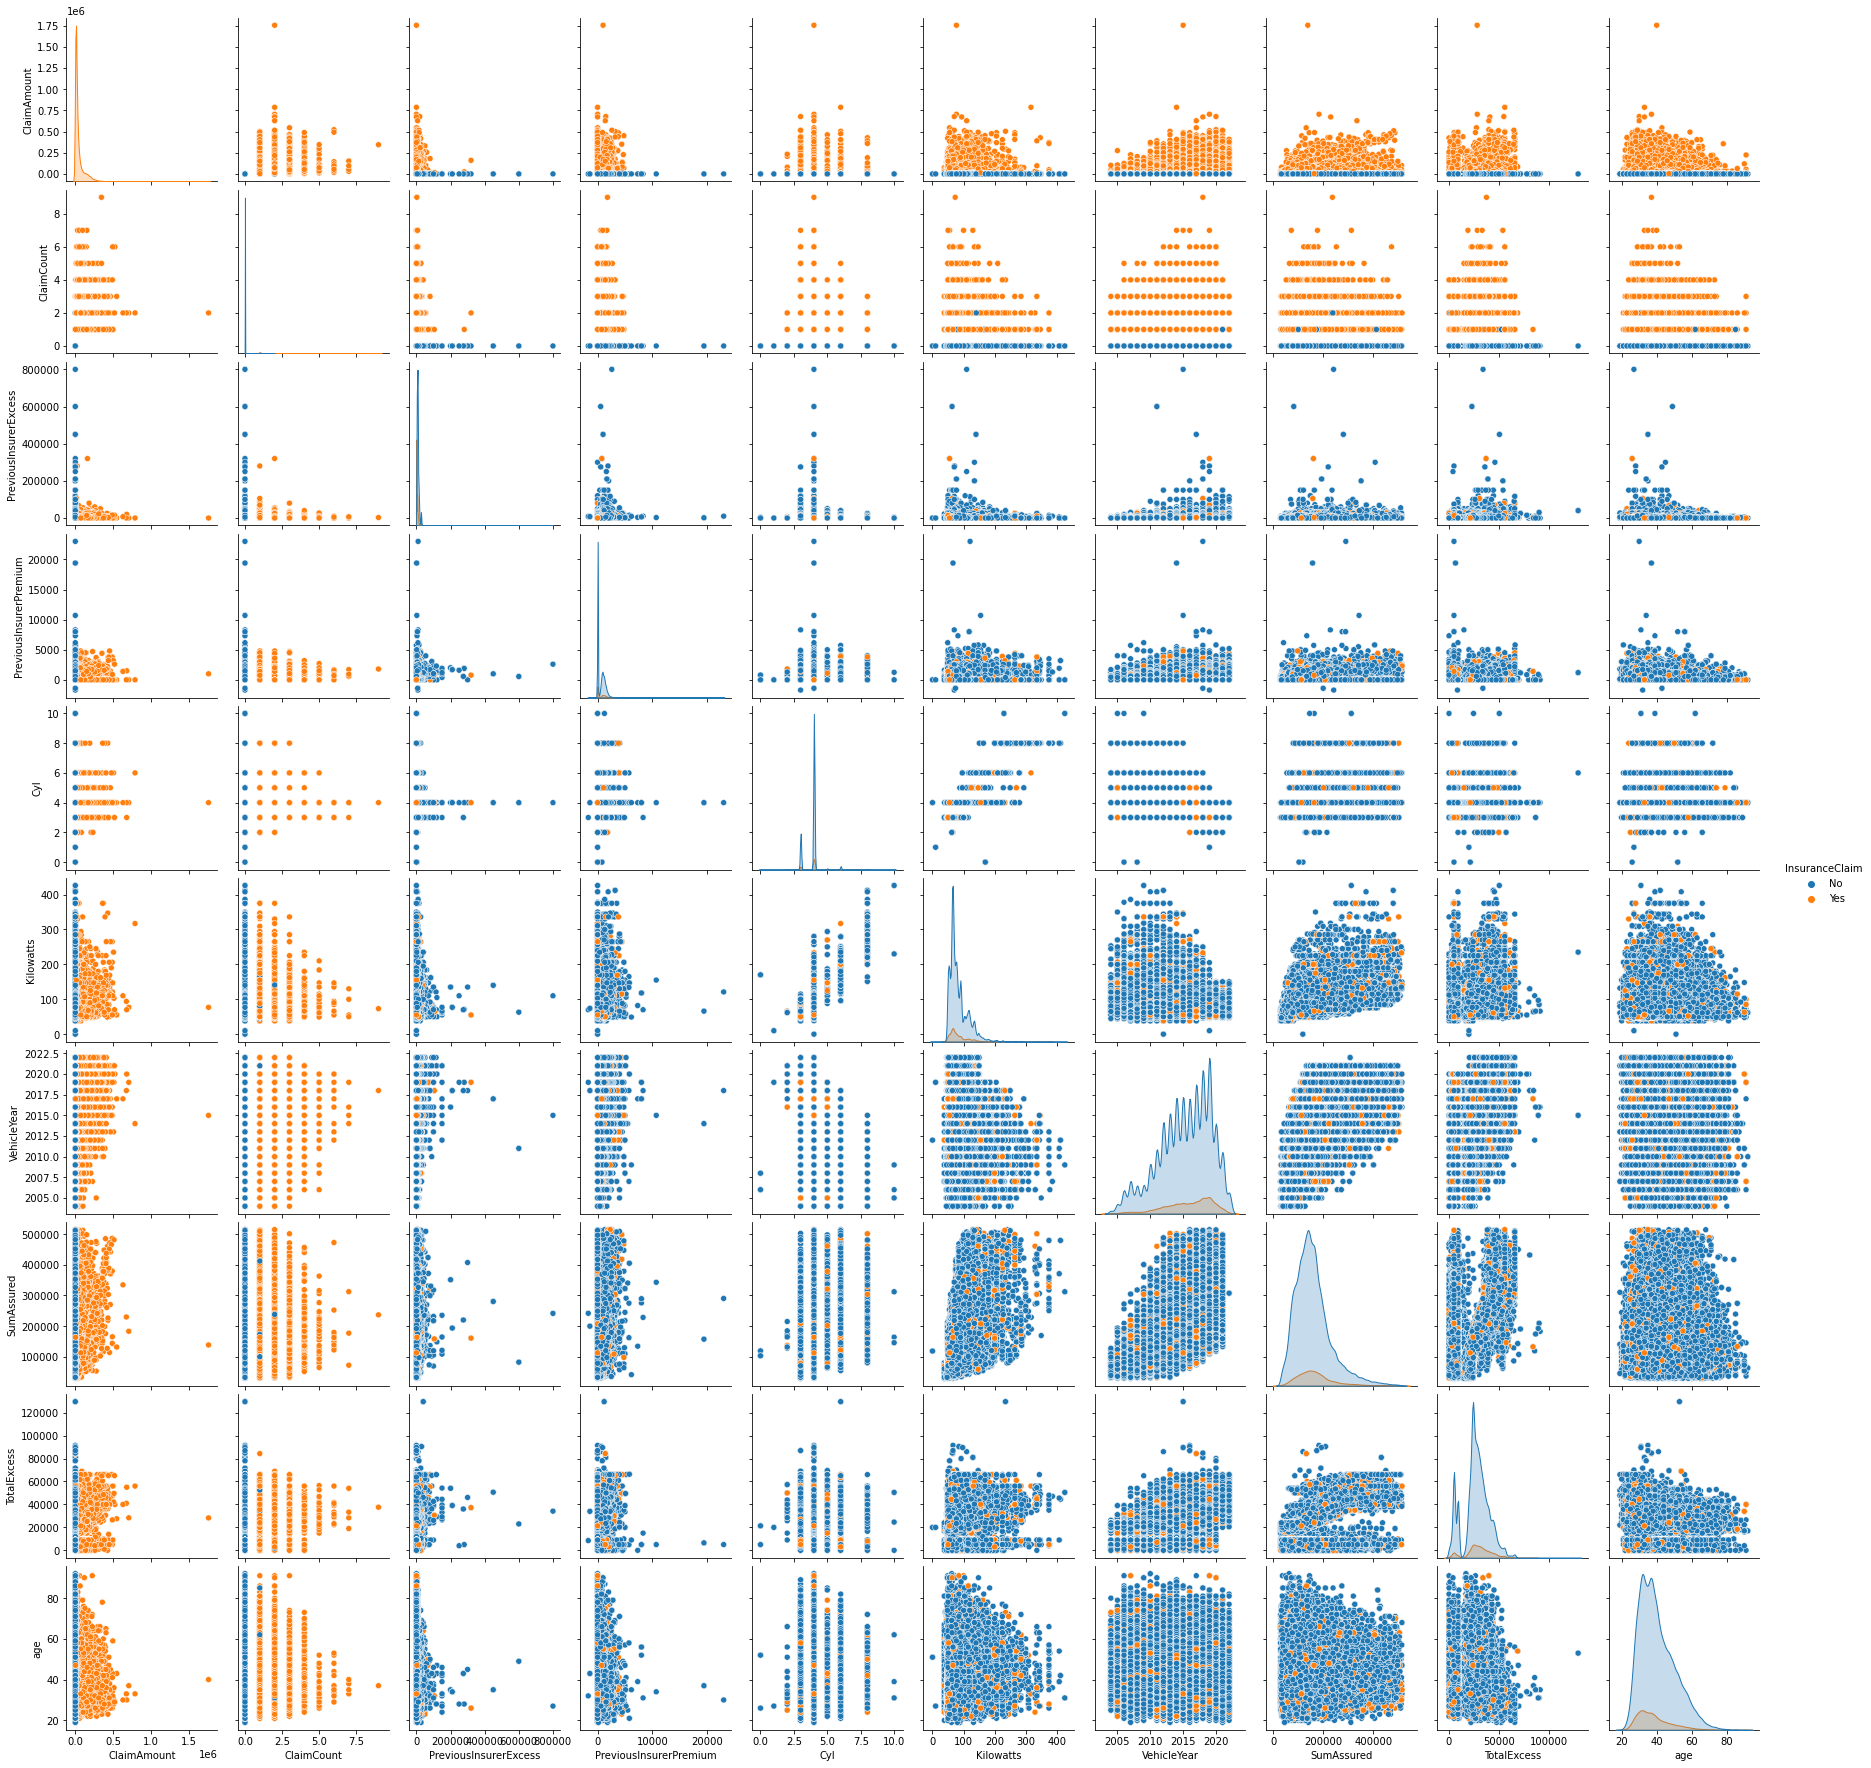

In [26]:
# For More exploration
g = sns.pairplot(df_num_var, hue = 'InsuranceClaim')
plt.show();

**Observations:**
* The majority of claim count was 0, and the hue, indicated that there was no claim
* The claim count reduces as the total excess increases. The excess with the highest claim count is about 39,000 Rands
* As the Vehicle year increases, the claim count and claim amount increases as well, the year with the highest claim count is     2017.
* The kilowatts with the highest claim amount and highest claim count is less than 100KW, and as the kilowatts increses, both     the claim amount and and claim count reduces.
* The cyl with the highest claim amount and claim count is 4
* The age with the highest claim amount and claim count is about 40 years. as policy holders grow older, the claim amount         and claim count starts to drop

# Categorical Features Distribution

Here I am interested to see how how the categorical features like gender, industry type, etc. influences the claim amount.

([<matplotlib.patches.Wedge at 0x2456f8d6cd0>,
 [Text(-0.5080773468610468, 0.9756318002231373, 'Male'),
  Text(0.5080774382062859, -0.9756317526534989, 'Female')],
 [Text(-0.27713309828784366, 0.5321628001217112, '65.28%'),
  Text(0.2771331481125196, -0.5321627741746356, '34.72%')])

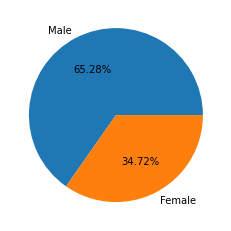

In [27]:
# Gender proportion in dataset

df["Gender"].value_counts()

Genders =  df.Gender.value_counts().index
Gender_count = df.Gender.value_counts().values

plt.pie(Gender_count, labels=Genders, autopct="%1.2f%%")

**Observations:**
* 65.3% of policy holders captured in this dataset are male while 34.7% are female

In [68]:
# List of the different employment type recorded in the dataset
df_prep["EmploymentType"].value_counts()

Permanent             220552
Self-Employed          18943
Temporary / Casual      6889
Retired                 5770
Unemployed              4286
Part-time               3705
Commission Earner        189
Name: EmploymentType, dtype: int64

In [69]:
# List of the different employers of policy holders recorded in the dataset
df_prep["Employer"].value_counts()

Self Employed                                             1531
DOE                                                       1381
DOH                                                        795
Unemployed                                                 622
Retired                                                    525
SAPS                                                       436
Pensioner                                                  226
SA National Defence Force                                  166
Department of Social Development                           113
ABSA                                                        96
Eskom                                                       92
Sasol                                                       89
Transnet                                                    87
Standard Bank                                               85
Anglo American                                              79
Sanlam                                                 

In [70]:
# Occupation of policy holders recorded
df_prep["Occupation"].value_counts()

Educator                   10188
Self Employed               5840
Teacher                     4466
Nurse                       4127
Driver                      4037
                           ...  
MULTI-SKILLED OPERATOR         1
Assistant Planner              1
MANAGING DIRECTOR              1
Head Team Leader               1
Service Champion               1
Name: Occupation, Length: 27981, dtype: int64

In [71]:
# Industry types counts recorded in the dataset
df_prep["IndustryType"].value_counts()

Other                                 124116
Government                             48685
Professional                           28914
Government Education                   20973
Office / Clerical / Manager            14566
Mining                                 11616
Medical                                 6907
Construction                            2751
Charity                                  197
Trade (e.g Electrician or Plumber)       134
Name: IndustryType, dtype: int64

In [72]:
# Marital Status counts recorded in the dataset
df_prep["MaritalStatus"].value_counts()

Single      133594
Married     113017
Divorced     11076
Widowed       5297
Name: MaritalStatus, dtype: int64

In [73]:
# Vehicle make counts recorded in the dataset
df_prep["Make"].value_counts()

VOLKSWAGEN    69516
TOYOTA        30850
HYUNDAI       25149
RENAULT       20927
FORD          19376
              ...  
JINBEI            1
DFM               1
ROVER             1
ZX AUTO           1
MEIYA             1
Name: Make, Length: 68, dtype: int64

In [74]:
# Provinces of policy holders recorded in the dataset
df_prep["PersonProvince"].value_counts()

GAUTENG          107988
KWAZULU-NATAL     47491
MPUMALANGA        20007
EASTERN CAPE      19227
LIMPOPO           19193
WESTERN CAPE      17302
NORTH WEST        15914
FREE STATE        10547
NORTHERN CAPE      5315
Name: PersonProvince, dtype: int64

In [75]:
# Policy status
df_prep["PolicyStatus"].value_counts()

Active       113661
Cancelled     71636
Lapsed        63158
Pending       14529
Name: PolicyStatus, dtype: int64

In [76]:
# Policy holders annual milage count
df_prep["PolicyMainDriverAnnualMileage"].value_counts()

15000+ km            195509
10000 to 14999 km     26723
5000 to 9999 km       20944
<5000 km              19808
Name: PolicyMainDriverAnnualMileage, dtype: int64

In [77]:
df_prep["BodyType"].value_counts()

H/B    149785
S/D     49173
SUV     25786
S/C     15339
D/C      8078
MPV      5484
C/P      2675
X/O      2592
C/B       890
SAV       735
B/S       590
D/S       539
P/V       520
S/W       486
C/C       257
R/V        53
H/T         2
Name: BodyType, dtype: int64

In [78]:
df_prep["Model"].value_counts()

POLO VIVO 1.4 TRENDLINE (5DR)         7447
POLO VIVO GP 1.4 TRENDLINE 5DR        4357
POLO VIVO 1.4 COMFORTLINE (5DR)       4104
i20 1.2 MOTION                        3682
POLO GP 1.2 TSI COMFORTLINE (66KW)    3453
                                      ... 
IMPREZA 2.5 RS AWD                       1
POLO 1.9 TDi                             1
STEED 5 2.0 SX 4X4 D/C P/U               1
323 130 SEDAN                            1
GOLF SV 2.0 TDI COMFORTLINE              1
Name: Model, Length: 5692, dtype: int64

## Visualizing the attributes

Here I will show visuals of how the categorical variables are related to the Claim Amount

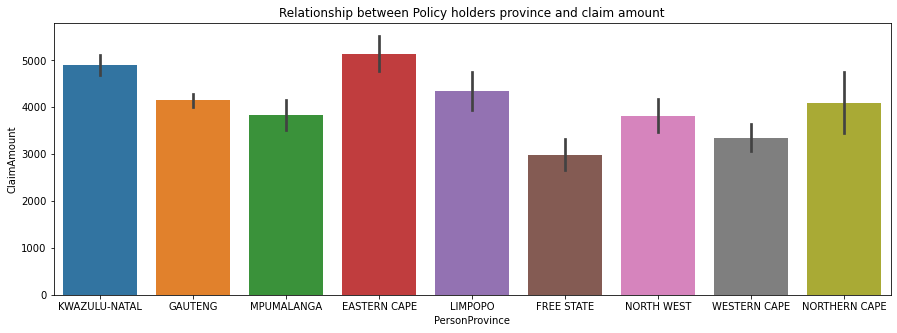

In [37]:
# Relationship between Policy holders province and claim amount
plt.figure(figsize=(15,5))
sns.barplot(x = "PersonProvince", y = "ClaimAmount", data = df_prep)
plt.title('Relationship between Policy holders province and claim amount');
plt.show();

**Observations:**
* Four provinces recorded an average greater than 4000 Rands Claim Amount recorded, with Eastern Cape being the highest           followed by Kwazulu-Natal then Limpopo and Northern Cape, respectively.

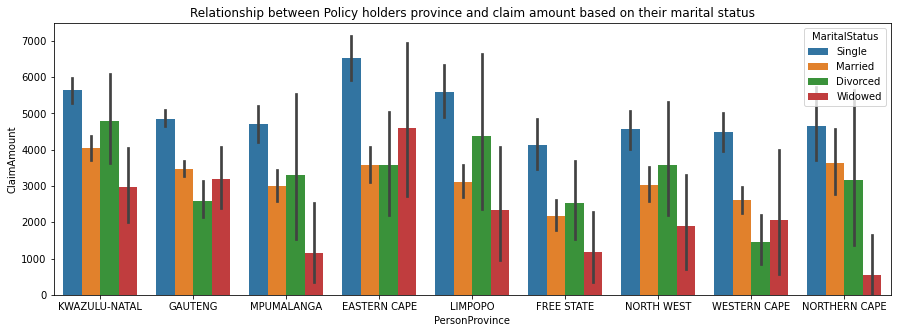

In [38]:
# Relationship between Policy holders province and claim amount based on their marital status 
plt.figure(figsize=(15,5))
sns.barplot(x = "PersonProvince", y = "ClaimAmount", hue = "MaritalStatus", data = df_prep)
plt.title('Relationship between Policy holders province and claim amount based on their marital status');
plt.show();

**Observations:**
* In every provinces, Singles recorded the highest claim amount, while widowed recorded the least claim amount in all provinces   except in Guateng, Eastern Cape and Western Cape. we will neet more data to know why.

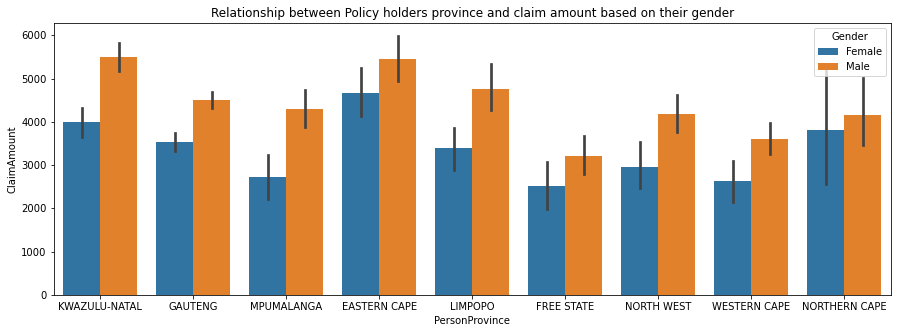

In [39]:
# Relationship between Policy holders province and claim amount based on their gender 
plt.figure(figsize=(15,5))
sns.barplot(x = "PersonProvince", y = "ClaimAmount", hue = "Gender", data = df_prep)
plt.title('Relationship between Policy holders province and claim amount based on their gender');
plt.show();

**Observations:**
* Male records the highest average claim amount in every province by a good margin, because the dataset recorded more male, but   in Northern Cape, the margin between male and female average Claim amount is small

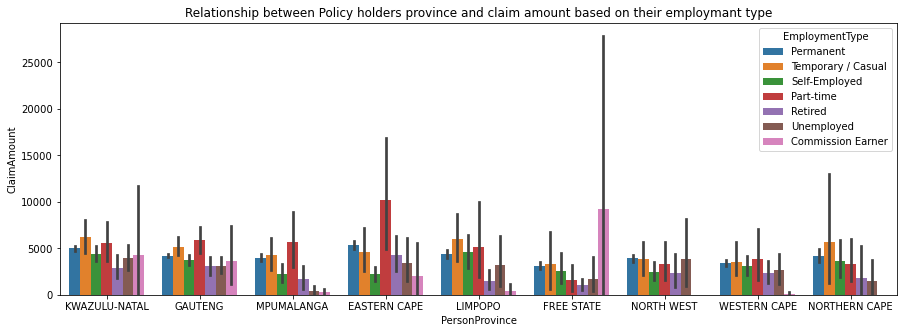

In [40]:
# Relationship between Policy holders province and claim amount based on their employmant type 
plt.figure(figsize=(15,5))
sns.barplot(x = "PersonProvince", y = "ClaimAmount", hue = "EmploymentType", data = df_prep)
plt.title('Relationship between Policy holders province and claim amount based on their employmant type');
plt.show();

**Observations:**
* Three emplyment types stood out, they are; Part-time in Eastern Cape, Commission Earners in Free State, Temporary/Casual in     Northern Cape

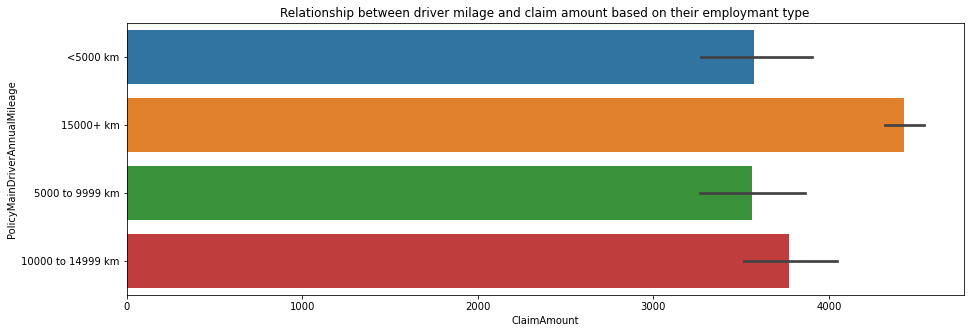

In [41]:
# Relationship between driver milage and claim amount based on their employmant type 
plt.figure(figsize=(15,5))
sns.barplot(x = "ClaimAmount", y = "PolicyMainDriverAnnualMileage", data = df_prep)
plt.title('Relationship between driver milage and claim amount based on their employmant type');
plt.show();

**Observations:**
* The data shows that the average claim amount increases with an increase in annual millage.

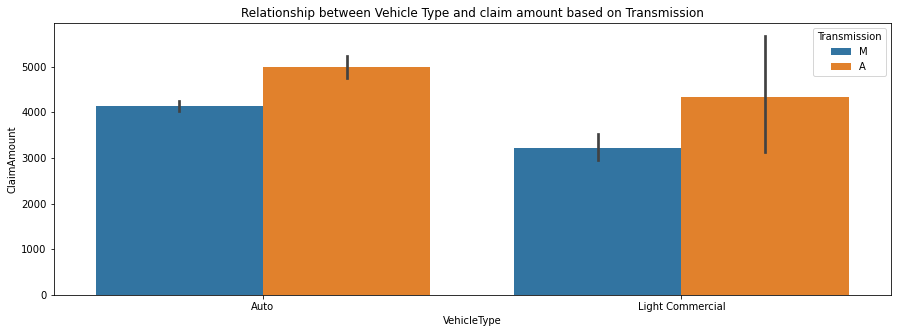

In [42]:
# Relationship between Vehicle Type and claim amount based on Transmission 
plt.figure(figsize=(15,5))
sns.barplot(x = "VehicleType", y = "ClaimAmount",  hue = "Transmission",  data = df_prep)
plt.title('Relationship between Vehicle Type and claim amount based on Transmission');
plt.show();

**Observations:**
* TAutomatic transmission recorded the highest claim amount.

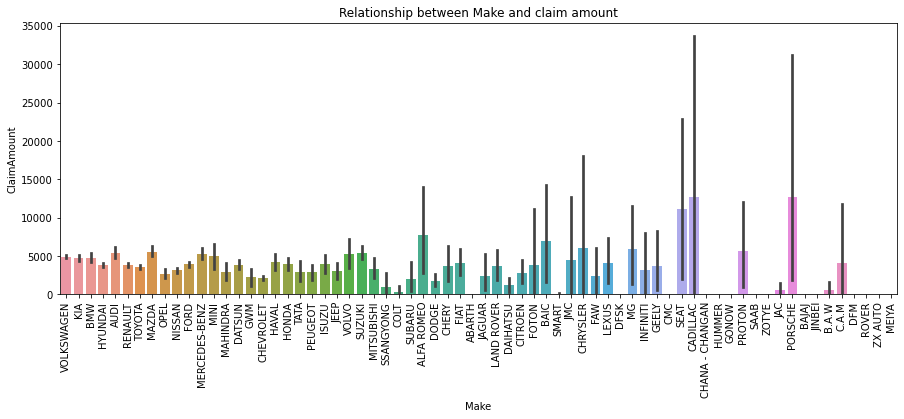

In [43]:
# Relationship between Make and claim amount
plt.figure(figsize=(15,5))
sns.barplot(x = "Make", y = "ClaimAmount", data = df_prep)
plt.title('Relationship between Make and claim amount')
plt.xticks(rotation=90);
plt.show();

**Observations:**
* Cadillac, Porsche and Seat are the vehicles with the highest avaerage claim amount, despite the fact that they are not the     most car driven by policy holders recorded in the dataset

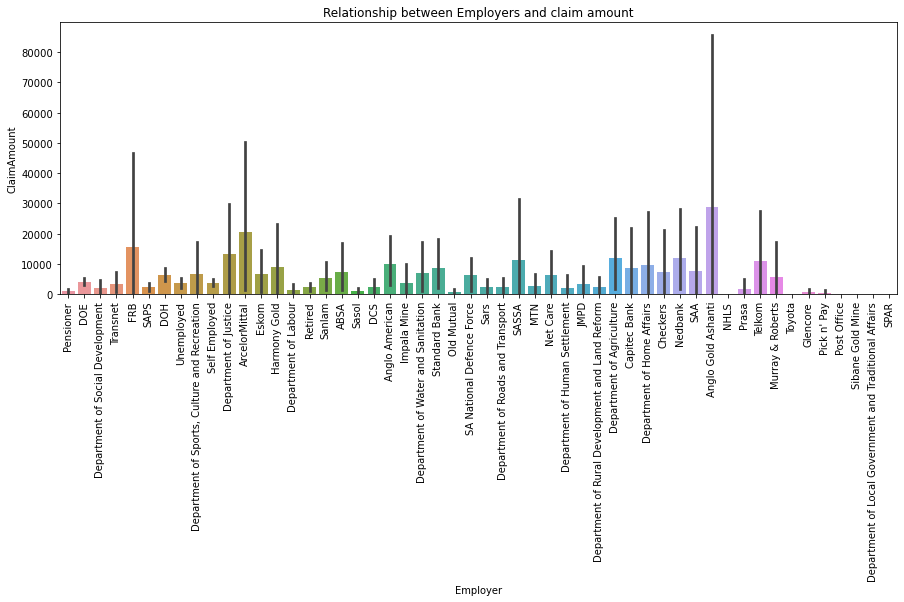

In [44]:
# Relationship between Occupation and claim amount
plt.figure(figsize=(15,5))
sns.barplot(x = "Employer", y = "ClaimAmount", data = df_prep)
plt.title('Relationship between Employers and claim amount')
plt.xticks(rotation=90);
plt.show();

**Observations:**
* Three employers withy the highest claim amount recorded are Anglo Gold Ashanti, Arcelor Mittal and FRB

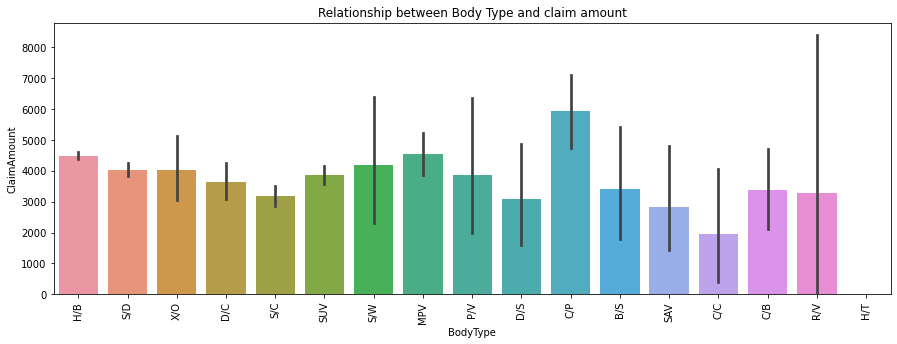

In [46]:
# Relationship between Body Type and claim amount
plt.figure(figsize=(15,5))
sns.barplot(x = "BodyType", y = "ClaimAmount", data = df_prep)
plt.title('Relationship between Body Type and claim amount')
plt.xticks(rotation=90);
plt.show();

**Observations:**
* Even though C/P is not in the top 5 most popular vehicles on the dataset, it recorded the highest claim amount, with C/C recording the least claim amount

# Features Engineering

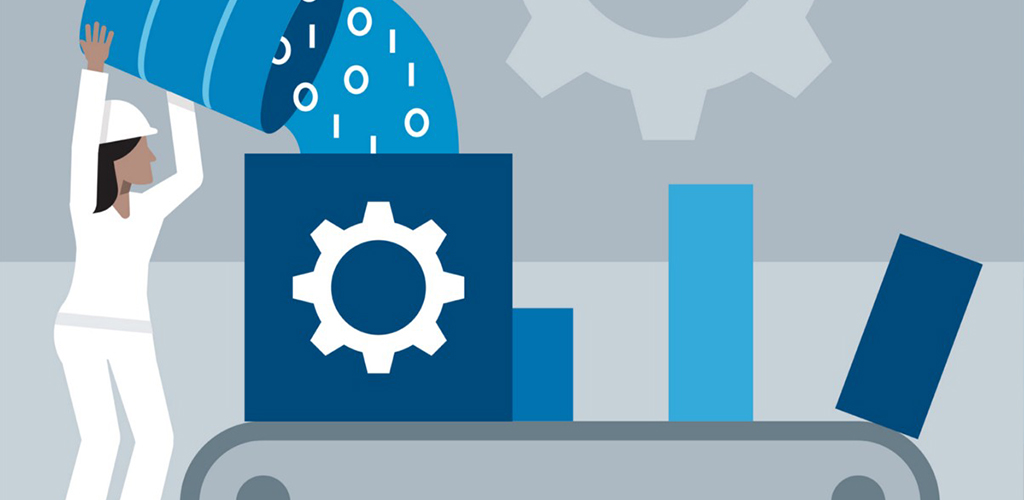

**Here I will
* Calculate exposure
* Drop columns with high percentage of missing values
* Drop irrelevant columns especially columns that answers questions policy holders can't be asked over the phone
* Drop rows with high percentage of missing values
* Replace missing values with mean or mode
* Extract first name from vehicles to minimize their varieties, reduce redundancy and make sense of the data
* Assign 'other' to low frequency categories retaining the top 10
* Binarize Numerical Features
* One hot encode categorical Features

In [411]:
df_copy = df_prep.copy()

In [412]:
df_copy.head()

PolicyId  ClaimId   ClaimAmount  ClaimCount  PreviousInsurerExcess  \
0  10806273       NaN          0.0         0.0                    0.0   
1  10822247       NaN          0.0         0.0                 4500.0   
2  10941976       NaN          0.0         0.0                    0.0   
3  10782539       NaN          0.0         0.0                    0.0   
4  10916477       NaN          0.0         0.0                    0.0   

   PreviousInsurerPremium      EmploymentType  IsMemberPayer Employer  \
0                     0.0           Permanent              1      NaN   
1                   900.0           Permanent              1      NaN   
2                   808.0           Permanent              1      NaN   
3                     0.0  Temporary / Casual              1      NaN   
4                     0.0           Permanent              1      NaN   

                  Occupation                 IndustryType  Gender  \
0  Human Resource Consultant  Office / Clerical / Manager  Female   
1                   Sale Rep                   Government    Male   
2             Safety Officer  Office / Clerical / Manager  Female   
3       Cic support engineer                        Other  Female   
4       Correctional Officer                   Government    Male   

  MaritalStatus        Make                             Model  Colour  \
0        Single  VOLKSWAGEN                          POLO 1.4    grey   
1        Single  VOLKSWAGEN  POLO VIVO GP 1.4 CONCEPTLINE 5DR  silver   
2        Single  VOLKSWAGEN                 POLO VIVO 1.4 5Dr   white   
3        Single         KIA                       RIO 1.2 5DR   white   
4        Single         BMW                320i M SPORT (F30)    blue   

  Transmission VehicleType BodyType  CubicCapacity  Cyl  Kilowatts  \
0            M        Auto      H/B         1390.0  4.0       62.0   
1            M        Auto      H/B         1398.0  4.0       55.0   
2            M        Auto      H/B         1398.0  4.0       55.0   
3            M        Auto      H/B         1248.0  4.0       62.0   
4            M        Auto      S/D         1998.0  4.0      135.0   

   VehicleYear PolicyMainDriverAnnualMileage  \
0       2005.0                      <5000 km   
1       2015.0                     15000+ km   
2       2014.0               5000 to 9999 km   
3       2017.0                     15000+ km   
4       2015.0                      <5000 km   

  PolicyMainDriverLicenseDurationRange PersonProvince            Area  \
0                            15+ years  KWAZULU-NATAL   Dolphin Coast   
1                        6 to 11 years        GAUTENG        PRETORIA   
2                        6 to 11 years     MPUMALANGA        PRETORIA   
3                         1 to 6 years        GAUTENG        NOORDWYK   
4                            15+ years   EASTERN CAPE             NaN   

   MonthsSinceInception  DaysSinceInception PolicyStatus CommencementDt  \
0                  23.0               723.0    Cancelled     2020-01-06   
1                   5.0               151.0       Lapsed     2020-05-18   
2                   NaN                 NaN       Active     2022-05-30   
3                  26.0               800.0    Cancelled     2019-07-18   
4                   3.0                96.0       Lapsed     2022-01-10   

                 PolicyEndDate  SumAssured   MeanExcess  TotalExcess  \
0  2021-12-29 14:46:25.4847000     45700.0  3166.666666      19000.0   
1  2020-10-16 00:00:44.0122000    113100.0  4500.000000       9000.0   
2                          NaN     92900.0  3333.333333      20000.0   
3  2021-09-25 14:09:25.7650000    173800.0  5720.000000      34320.0   
4  2022-04-16 00:02:41.8644000    240200.0  6286.666666      37720.0   

   ExcessTypesCount  BaseExcess  NomimatedDriversCount  \
0               6.0      1000.0                    2.0   
1               2.0      5000.0                    1.0   
2               6.0      1000.0                    0.0   
3     

In [413]:
df_copy.shape

(262990, 41)

In [414]:
df_copy.dtypes

PolicyId                                         int64
ClaimId                                        float64
ClaimAmount                                    float64
ClaimCount                                     float64
PreviousInsurerExcess                          float64
PreviousInsurerPremium                         float64
EmploymentType                                  object
IsMemberPayer                                    int64
Employer                                        object
Occupation                                      object
IndustryType                                    object
Gender                                          object
MaritalStatus                                   object
Make                                            object
Model                                           object
Colour                                          object
Transmission                                    object
VehicleType                                     object
BodyType  

### Calculate Exposure

In [415]:
# First convert PolicyEndDate to datetime dtype from pbject dtype
df_copy['PolicyEndDate'] =  pd.to_datetime(df_copy['PolicyEndDate'])

In [416]:
# Calculate Exposure
df_copy["Exposure"] = [(-1*round((x-y).total_seconds()/(60*60*24))/365) if pd.isna(y)==False and\
                 (-1*round((x-y).total_seconds()/(60*60*24))/365)<1 else 1 for x,y in zip(df_copy["CommencementDt"],\
                                                                                          df_copy["PolicyEndDate"])]

### Drop columns with high percentage of missing values

In [417]:
# First, get the percentage of missing values per column
percent_missing = (df_copy.isnull().sum().sort_values(ascending = False) * 100 / len(df_copy)).round(2)
percent_missing

Employer                                97.23
ClaimId                                 89.55
MonthsSinceInception                    48.75
DaysSinceInception                      48.75
PolicyEndDate                           48.75
Area                                    25.52
SumAssured                              15.99
IndustryType                             1.57
EmploymentType                           1.01
Occupation                               0.85
PreviousInsurerPremium                   0.01
PreviousInsurerExcess                    0.01
Gender                                   0.00
PolicyMainDriverAnnualMileage            0.00
CommencementDt                           0.00
PolicyStatus                             0.00
MeanExcess                               0.00
TotalExcess                              0.00
ExcessTypesCount                         0.00
PersonProvince                           0.00
PolicyMainDriverLicenseDurationRange     0.00
Kilowatts                         

**Observations:**
* The Employer, ClaimId, DaysSinceInception, PolicyEndDate, MonthsSinceInception columns have high percentage of missing values, so I will drop them.

In [418]:
# Drop the columns with High percentage of missing values
df_copy = df_copy.drop(["Employer", "ClaimId ", "DaysSinceInception", "PolicyEndDate", "MonthsSinceInception"], axis=1)

In [419]:
df_copy.shape

(262990, 37)

### Drop irrelevant columns especially columns that answers questions policy holders can't be asked over the phone

In [420]:
df_copy.columns

Index(['PolicyId', 'ClaimAmount', 'ClaimCount', 'PreviousInsurerExcess',
       'PreviousInsurerPremium', 'EmploymentType', 'IsMemberPayer',
       'Occupation', 'IndustryType', 'Gender', 'MaritalStatus', 'Make',
       'Model', 'Colour', 'Transmission', 'VehicleType', 'BodyType',
       'CubicCapacity', 'Cyl', 'Kilowatts', 'VehicleYear',
       'PolicyMainDriverAnnualMileage', 'PolicyMainDriverLicenseDurationRange',
       'PersonProvince', 'Area', 'PolicyStatus', 'CommencementDt',
       'SumAssured', 'MeanExcess', 'TotalExcess', 'ExcessTypesCount',
       'BaseExcess', 'NomimatedDriversCount', 'NomimatedDriversUnder30Count',
       'age', 'InsuranceClaim', 'Exposure'],
      dtype='object')

In [421]:
df_copy = df_copy.drop(["ClaimCount", "CommencementDt", "Area"], axis=1)

**Observations:**
* The reason I dropped area is because, it contains missing values, if replaced with the mode, the area mode will most likely not match with the right province of the missing area

### Drop Rows with 15 out of 36 columns of missing values

In [422]:
# drop rows with 15 missing values
df_copy = df_copy.dropna(thresh=df.shape[1]-15, axis=0)

In [423]:
df_copy.shape

(262984, 34)

**Observations:**
* This drops 12 rows containing missing values > 50% of the available rows

### Replace missing values with mean for Numerical data or mode doe Categorical data

In [424]:
# First see columns with missing values
df_copy.isnull().sum()

PolicyId                                    0
ClaimAmount                                 0
PreviousInsurerExcess                      27
PreviousInsurerPremium                     29
EmploymentType                           2656
IsMemberPayer                               0
Occupation                               2244
IndustryType                             4125
Gender                                      2
MaritalStatus                               0
Make                                        0
Model                                       0
Colour                                      0
Transmission                                0
VehicleType                                 0
BodyType                                    0
CubicCapacity                               0
Cyl                                         0
Kilowatts                                   0
VehicleYear                                 0
PolicyMainDriverAnnualMileage               0
PolicyMainDriverLicenseDurationRan

In [425]:
# Fill missing values of numerical data with mean
df_copy['PreviousInsurerPremium'].fillna(int(df_copy['PreviousInsurerPremium'].mean()), inplace=True)
df_copy['PreviousInsurerExcess'].fillna(int(df_copy['PreviousInsurerExcess'].mean()), inplace=True)
df_copy['SumAssured'].fillna(int(df_copy['SumAssured'].mean()), inplace=True)

# Fill missing values of categorical data with mode
df_copy['EmploymentType'] = df_copy['EmploymentType'].fillna(df_copy['EmploymentType'].mode()[0])
df_copy['Occupation'] = df_copy['Occupation'].fillna(df_copy['Occupation'].mode()[0])
df_copy['IndustryType'] = df_copy['IndustryType'].fillna(df_copy['IndustryType'].mode()[0])
df_copy['Gender'] = df_copy['Gender'].fillna(df_copy['Gender'].mode()[0])

In [426]:
# Checking for missing values
df_copy.isnull().sum()

PolicyId                                0
ClaimAmount                             0
PreviousInsurerExcess                   0
PreviousInsurerPremium                  0
EmploymentType                          0
IsMemberPayer                           0
Occupation                              0
IndustryType                            0
Gender                                  0
MaritalStatus                           0
Make                                    0
Model                                   0
Colour                                  0
Transmission                            0
VehicleType                             0
BodyType                                0
CubicCapacity                           0
Cyl                                     0
Kilowatts                               0
VehicleYear                             0
PolicyMainDriverAnnualMileage           0
PolicyMainDriverLicenseDurationRange    0
PersonProvince                          0
PolicyStatus                      

### Extract first name from Model to minimize their varieties, reduce redundancy and make sense of the data

In [427]:
#Extract first name of vehicle model
df_copy['Model'] = df['Model'].str.extract(r"(\w+)", expand=True)

In [428]:
df_copy.head()

PolicyId  ClaimAmount  PreviousInsurerExcess  PreviousInsurerPremium  \
0  10806273          0.0                    0.0                     0.0   
1  10822247          0.0                 4500.0                   900.0   
2  10941976          0.0                    0.0                   808.0   
3  10782539          0.0                    0.0                     0.0   
4  10916477          0.0                    0.0                     0.0   

       EmploymentType  IsMemberPayer                 Occupation  \
0           Permanent              1  Human Resource Consultant   
1           Permanent              1                   Sale Rep   
2           Permanent              1             Safety Officer   
3  Temporary / Casual              1       Cic support engineer   
4           Permanent              1       Correctional Officer   

                  IndustryType  Gender MaritalStatus        Make Model  \
0  Office / Clerical / Manager  Female        Single  VOLKSWAGEN  POLO   
1                   Government    Male        Single  VOLKSWAGEN  POLO   
2  Office / Clerical / Manager  Female        Single  VOLKSWAGEN  POLO   
3                        Other  Female        Single         KIA   RIO   
4                   Government    Male        Single         BMW  320i   

   Colour Transmission VehicleType BodyType  CubicCapacity  Cyl  Kilowatts  \
0    grey            M        Auto      H/B         1390.0  4.0       62.0   
1  silver            M        Auto      H/B         1398.0  4.0       55.0   
2   white            M        Auto      H/B         1398.0  4.0       55.0   
3   white            M        Auto      H/B         1248.0  4.0       62.0   
4    blue            M        Auto      S/D         1998.0  4.0      135.0   

   VehicleYear PolicyMainDriverAnnualMileage  \
0       2005.0                      <5000 km   
1       2015.0                     15000+ km   
2       2014.0               5000 to 9999 km   
3       2017.0                     15000+ km   
4       2015.0                      <5000 km   

  PolicyMainDriverLicenseDurationRange PersonProvince PolicyStatus  \
0                            15+ years  KWAZULU-NATAL    Cancelled   
1                        6 to 11 years        GAUTENG       Lapsed   
2                        6 to 11 years     MPUMALANGA       Active   
3                         1 to 6 years        GAUTENG    Cancelled   
4                            15+ years   EASTERN CAPE       Lapsed   

   SumAssured   MeanExcess  TotalExcess  ExcessTypesCount  BaseExcess  \
0     45700.0  3166.666666      19000.0               6.0      1000.0   
1    113100.0  4500.000000       9000.0               2.0      5000.0   
2     92900.0  3333.333333      20000.0               6.0      1000.0   
3    173800.0  5720.000000      34320.0               6.0      5000.0   
4    240200.0  6286.666666      37720.0               6.0      5000.0   

   NomimatedDriversCount  NomimatedDriversUnder30Count   age InsuranceClaim  \
0                    2.0                           1.0  55.0             No   
1                    1.0                           1.0  30.0             No   
2                    0.0                           0.0  33.0             No   
3                    1.0                           0.0  31.0             No   
4                    0.0                           0.0  46.0             No   

   Exposure  
0  1.000000  
1  0.413699  
2  1.000000  
3  1.000000  
4  0.263014

### Concatenate Model and Make columns to create VehicleMake column, then drop Model and Make columns

In [429]:
# Concatenate Make and Model columns to create VehicleMake column
df_copy["VehicleMake"] = df_copy[["Make", "Model"]].apply(" ".join, axis=1)

In [430]:
# Drop Make and Model columns
df_copy = df_copy.drop(["Make", "Model"], axis=1)

In [431]:
df_copy.head()

PolicyId  ClaimAmount  PreviousInsurerExcess  PreviousInsurerPremium  \
0  10806273          0.0                    0.0                     0.0   
1  10822247          0.0                 4500.0                   900.0   
2  10941976          0.0                    0.0                   808.0   
3  10782539          0.0                    0.0                     0.0   
4  10916477          0.0                    0.0                     0.0   

       EmploymentType  IsMemberPayer                 Occupation  \
0           Permanent              1  Human Resource Consultant   
1           Permanent              1                   Sale Rep   
2           Permanent              1             Safety Officer   
3  Temporary / Casual              1       Cic support engineer   
4           Permanent              1       Correctional Officer   

                  IndustryType  Gender MaritalStatus  Colour Transmission  \
0  Office / Clerical / Manager  Female        Single    grey            M   
1                   Government    Male        Single  silver            M   
2  Office / Clerical / Manager  Female        Single   white            M   
3                        Other  Female        Single   white            M   
4                   Government    Male        Single    blue            M   

  VehicleType BodyType  CubicCapacity  Cyl  Kilowatts  VehicleYear  \
0        Auto      H/B         1390.0  4.0       62.0       2005.0   
1        Auto      H/B         1398.0  4.0       55.0       2015.0   
2        Auto      H/B         1398.0  4.0       55.0       2014.0   
3        Auto      H/B         1248.0  4.0       62.0       2017.0   
4        Auto      S/D         1998.0  4.0      135.0       2015.0   

  PolicyMainDriverAnnualMileage PolicyMainDriverLicenseDurationRange  \
0                      <5000 km                            15+ years   
1                     15000+ km                        6 to 11 years   
2               5000 to 9999 km                        6 to 11 years   
3                     15000+ km                         1 to 6 years   
4                      <5000 km                            15+ years   

  PersonProvince PolicyStatus  SumAssured   MeanExcess  TotalExcess  \
0  KWAZULU-NATAL    Cancelled     45700.0  3166.666666      19000.0   
1        GAUTENG       Lapsed    113100.0  4500.000000       9000.0   
2     MPUMALANGA       Active     92900.0  3333.333333      20000.0   
3        GAUTENG    Cancelled    173800.0  5720.000000      34320.0   
4   EASTERN CAPE       Lapsed    240200.0  6286.666666      37720.0   

   ExcessTypesCount  BaseExcess  NomimatedDriversCount  \
0               6.0      1000.0                    2.0   
1               2.0      5000.0                    1.0   
2               6.0      1000.0                    0.0   
3               6.0      5000.0                    1.0   
4               6.0      5000.0                    0.0   

   NomimatedDriversUnder30Count   age InsuranceClaim  Exposure  \
0                           1.0  55.0             No  1.000000   
1                           1.0  30.0             No  0.413699   
2                           0.0  33.0             No  1.000000   
3                           0.0  31.0             No  1.000000   
4                           0.0  46.0             No  0.263014   

       VehicleMake  
0  VOLKSWAGEN POLO  
1  VOLKSWAGEN POLO  
2  VOLKSWAGEN POLO  
3          KIA RIO  
4         BMW 320i

### Assign 'other' to low frequency categories retaining the top 10

In [432]:
#Select top categories and replace rest with other
categorical_features = [i for i in df_copy.columns if df_copy.dtypes[i]=='object']
top_i = 10
for col in categorical_features:
    df_copy[col] = df_copy[col].str.lower()
    top_categories = df_copy[col].value_counts().head(top_i).index.tolist()
    df_copy.loc[~df_copy[col].isin(top_categories), col] = 'Other'

In [433]:
df_copy.head()

PolicyId  ClaimAmount  PreviousInsurerExcess  PreviousInsurerPremium  \
0  10806273          0.0                    0.0                     0.0   
1  10822247          0.0                 4500.0                   900.0   
2  10941976          0.0                    0.0                   808.0   
3  10782539          0.0                    0.0                     0.0   
4  10916477          0.0                    0.0                     0.0   

       EmploymentType  IsMemberPayer Occupation                 IndustryType  \
0           permanent              1      Other  office / clerical / manager   
1           permanent              1      Other                   government   
2           permanent              1      Other  office / clerical / manager   
3  temporary / casual              1      Other                        other   
4           permanent              1      Other                   government   

   Gender MaritalStatus  Colour Transmission VehicleType BodyType  \
0  female        single    grey            m        auto      h/b   
1    male        single  silver            m        auto      h/b   
2  female        single   white            m        auto      h/b   
3  female        single   white            m        auto      h/b   
4    male        single    blue            m        auto      s/d   

   CubicCapacity  Cyl  Kilowatts  VehicleYear PolicyMainDriverAnnualMileage  \
0         1390.0  4.0       62.0       2005.0                      <5000 km   
1         1398.0  4.0       55.0       2015.0                     15000+ km   
2         1398.0  4.0       55.0       2014.0               5000 to 9999 km   
3         1248.0  4.0       62.0       2017.0                     15000+ km   
4         1998.0  4.0      135.0       2015.0                      <5000 km   

  PolicyMainDriverLicenseDurationRange PersonProvince PolicyStatus  \
0                            15+ years  kwazulu-natal    cancelled   
1                        6 to 11 years        gauteng       lapsed   
2                        6 to 11 years     mpumalanga       active   
3                         1 to 6 years        gauteng    cancelled   
4                            15+ years   eastern cape       lapsed   

   SumAssured   MeanExcess  TotalExcess  ExcessTypesCount  BaseExcess  \
0     45700.0  3166.666666      19000.0               6.0      1000.0   
1    113100.0  4500.000000       9000.0               2.0      5000.0   
2     92900.0  3333.333333      20000.0               6.0      1000.0   
3    173800.0  5720.000000      34320.0               6.0      5000.0   
4    240200.0  6286.666666      37720.0               6.0      5000.0   

   NomimatedDriversCount  NomimatedDriversUnder30Count   age InsuranceClaim  \
0                    2.0                           1.0  55.0             no   
1                    1.0                           1.0  30.0             no   
2                    0.0                           0.0  33.0             no   
3                    1.0                           0.0  31.0             no   
4                    0.0                           0.0  46.0             no   

   Exposure      VehicleMake  
0  1.000000  volkswagen polo  
1  0.413699  volkswagen polo  
2  1.000000  volkswagen polo  
3  1.000000            Other  
4  0.263014            Other

### Binarize Numerical Features

In [434]:
# Numerical columns binarization
n_bins = 4
numeric = [i for i in list(df_copy.columns) if df_copy.dtypes[i]!='object' 
                if i not in ['ClaimAmount', 'Exposure', 'PolicyId']]

binarizer = KBinsDiscretizer(n_bins=n_bins, encode='ordinal', strategy='uniform')

df_copy.loc[:, numeric] = binarizer.fit_transform(X=df_copy[numeric])

In [435]:
df_copy.head()

PolicyId  ClaimAmount  PreviousInsurerExcess  PreviousInsurerPremium  \
0  10806273          0.0                    0.0                     0.0   
1  10822247          0.0                    0.0                     0.0   
2  10941976          0.0                    0.0                     0.0   
3  10782539          0.0                    0.0                     0.0   
4  10916477          0.0                    0.0                     0.0   

       EmploymentType  IsMemberPayer Occupation                 IndustryType  \
0           permanent            3.0      Other  office / clerical / manager   
1           permanent            3.0      Other                   government   
2           permanent            3.0      Other  office / clerical / manager   
3  temporary / casual            3.0      Other                        other   
4           permanent            3.0      Other                   government   

   Gender MaritalStatus  Colour Transmission VehicleType BodyType  \
0  female        single    grey            m        auto      h/b   
1    male        single  silver            m        auto      h/b   
2  female        single   white            m        auto      h/b   
3  female        single   white            m        auto      h/b   
4    male        single    blue            m        auto      s/d   

   CubicCapacity  Cyl  Kilowatts  VehicleYear PolicyMainDriverAnnualMileage  \
0            0.0  1.0        0.0          0.0                      <5000 km   
1            0.0  1.0        0.0          2.0                     15000+ km   
2            0.0  1.0        0.0          2.0               5000 to 9999 km   
3            0.0  1.0        0.0          2.0                     15000+ km   
4            1.0  1.0        1.0          2.0                      <5000 km   

  PolicyMainDriverLicenseDurationRange PersonProvince PolicyStatus  \
0                            15+ years  kwazulu-natal    cancelled   
1                        6 to 11 years        gauteng       lapsed   
2                        6 to 11 years     mpumalanga       active   
3                         1 to 6 years        gauteng    cancelled   
4                            15+ years   eastern cape       lapsed   

   SumAssured  MeanExcess  TotalExcess  ExcessTypesCount  BaseExcess  \
0         0.0         0.0          0.0               3.0         0.0   
1         0.0         0.0          0.0               0.0         0.0   
2         0.0         0.0          0.0               3.0         0.0   
3         1.0         0.0          1.0               3.0         0.0   
4         1.0         0.0          1.0               3.0         0.0   

   NomimatedDriversCount  NomimatedDriversUnder30Count  age InsuranceClaim  \
0                    0.0                           0.0  1.0             no   
1                    0.0                           0.0  0.0             no   
2                    0.0                           0.0  0.0             no   
3                    0.0                           0.0  0.0             no   
4                    0.0                           0.0  1.0             no   

   Exposure      VehicleMake  
0  1.000000  volkswagen polo  
1  0.413699  volkswagen polo  
2  1.000000  volkswagen polo  
3  1.000000            Other  
4  0.263014            Other

### One hot encode categorical Features

In [436]:
#Categorical columns hot encoding
category = [i for i in df_copy.columns if df_copy.dtypes[i]=='object']
for col in category:
    one_hot = pd.get_dummies(df_copy[col], prefix=col, prefix_sep='_', drop_first=True)
    df_copy = df_copy.join(one_hot)
    df_copy.drop([col], inplace=True, axis=1)

In [437]:
df_copy.head()

PolicyId  ClaimAmount  PreviousInsurerExcess  PreviousInsurerPremium  \
0  10806273          0.0                    0.0                     0.0   
1  10822247          0.0                    0.0                     0.0   
2  10941976          0.0                    0.0                     0.0   
3  10782539          0.0                    0.0                     0.0   
4  10916477          0.0                    0.0                     0.0   

   IsMemberPayer  CubicCapacity  Cyl  Kilowatts  VehicleYear  SumAssured  \
0            3.0            0.0  1.0        0.0          0.0         0.0   
1            3.0            0.0  1.0        0.0          2.0         0.0   
2            3.0            0.0  1.0        0.0          2.0         0.0   
3            3.0            0.0  1.0        0.0          2.0         1.0   
4            3.0            1.0  1.0        1.0          2.0         1.0   

   MeanExcess  TotalExcess  ExcessTypesCount  BaseExcess  \
0         0.0          0.0               3.0         0.0   
1         0.0          0.0               0.0         0.0   
2         0.0          0.0               3.0         0.0   
3         0.0          1.0               3.0         0.0   
4         0.0          1.0               3.0         0.0   

   NomimatedDriversCount  NomimatedDriversUnder30Count  age  Exposure  \
0                    0.0                           0.0  1.0  1.000000   
1                    0.0                           0.0  0.0  0.413699   
2                    0.0                           0.0  0.0  1.000000   
3                    0.0                           0.0  0.0  1.000000   
4                    0.0                           0.0  1.0  0.263014   

   EmploymentType_part-time  EmploymentType_permanent  EmploymentType_retired  \
0                         0                         1                       0   
1                         0                         1                       0   
2                         0                         1                       0   
3                         0                         0                       0   
4                         0                         1                       0   

   EmploymentType_self-employed  EmploymentType_temporary / casual  \
0                             0                                  0   
1                             0                                  0   
2                             0                                  0   
3                             0                                  1   
4                             0                                  0   

   EmploymentType_unemployed  Occupation_driver  Occupation_educator  \
0                          0                  0                    0   
1                          0                  0                    0   
2                          0                  0                    0   
3                          0                  0                    0   
4                          0                  0                    0   

   Occupation_manager  Occupation_nurse  Occupation_operator  \
0                   0                 0                    0   
1                   0                 0                    0   
2                   0                 0                    0   
3                   0                 0                    0   
4                   0                 0                    0   

   Occupation_police officer  Occupation_self employed  Occupation_supervisor  \
0                          0                         0                      0   
1                          0                         0                      0   
2                          0                         0                      0   
3                          0                         0                      0   
4                          0                         0                      0   

   Occupation_teacher  Occupation_unemployed  IndustryType_construction  \
0      

# Modelling

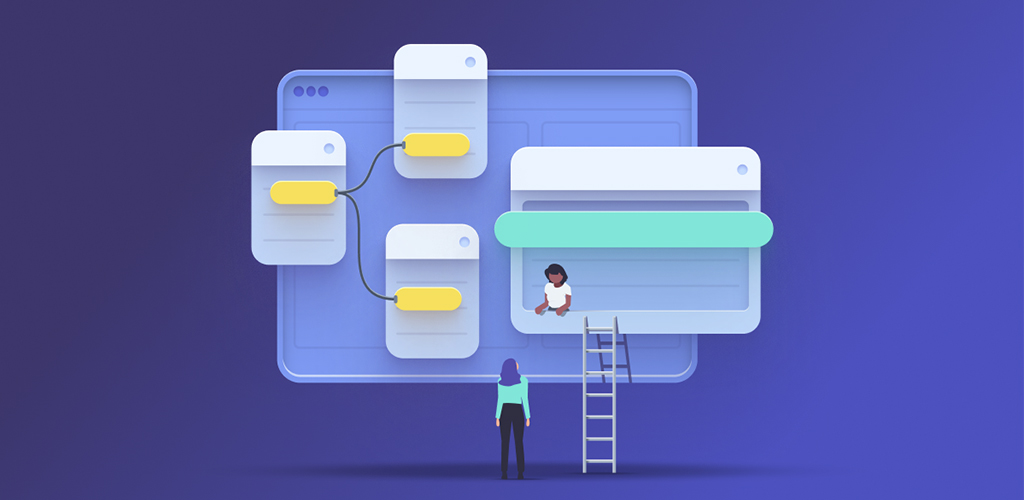

**Here I will
* Assign Target variable
* Split into Train, Validate and Test
* Scale Numerical Columns
* Perform Linear Regression

### Assign target variable

In [456]:
X = df_copy.drop(["ClaimAmount", "PolicyId"], axis=1)
y = df_copy["ClaimAmount"]

### Split into Train, Validate and Test

In [457]:
# set aside 20% of train and test data for evaluation
X_train, X_test, y_train, y_test = train_test_split(X, y,
    test_size=0.2, shuffle = True, random_state = 8)

# Use the same function above for the validation set
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, 
    test_size=0.25, random_state= 8) # 0.25 x 0.8 = 0.2

print("X_train shape: {}".format(X_train.shape))
print("X_test shape: {}".format(X_test.shape))
print("y_train shape: {}".format(y_train.shape))
print("y_test shape: {}".format(y_test.shape))
print("X_val shape: {}".format(y_train.shape))
print("y val shape: {}".format(y_test.shape))

X_train shape: (157790, 96)
X_test shape: (52597, 96)
y_train shape: (157790,)
y_test shape: (52597,)
X_val shape: (157790,)
y val shape: (52597,)


### Scaling numerical columns

In [458]:
# Scaling Numerical Columns
scaler = MinMaxScaler(feature_range=(0, 1), copy=True, clip=False)

categorical = [i for i in list(df_copy.columns) if i not in numeric 
                if i not in ['ClaimAmount', 'Exposure', 'PolicyId']]
X_train = pd.concat([pd.DataFrame(scaler.fit_transform(X_train[numeric]), columns=numeric), 
                     X_train[categorical].reset_index(drop=True), X_train["Exposure"].reset_index(drop=True)], axis=1)

X_val = pd.concat([pd.DataFrame(scaler.transform(X_val[numeric]), columns=numeric), 
                     X_val[categorical].reset_index(drop=True), X_val["Exposure"].reset_index(drop=True)], axis=1)

X_test = pd.concat([pd.DataFrame(scaler.transform(X_test[numeric]), columns=numeric), 
                     X_test[categorical].reset_index(drop=True), X_test["Exposure"].reset_index(drop=True)], axis=1)

## Linear Regression

In [459]:
lr = LinearRegression()

In [460]:
# Train the model on the training set
lr.fit(X_train, y_train)

# Let's make prediction on the training and validation set
y_train_pred = lr.predict(X_train)
y_val_pred = lr.predict(X_val)

In [461]:
# Print mean squared error on the training and validation set
print('MSE on training set:')
print(mean_squared_error(y_train, y_train_pred))
print('MSE on validation set:')
print(mean_squared_error(y_val, y_val_pred))
print('')

MSE on training set:
426328798.80757934
MSE on validation set:
413015927.5061336



In [462]:
# Print root mean squared error on the training and validation set
print('RMSE on training set:')
print(sqrt(mean_squared_error(y_train, y_train_pred)))
print('RMSE on validation set:')
print(sqrt(mean_squared_error(y_val, y_val_pred)))
print('')

RMSE on training set:
20647.731081345944
RMSE on validation set:
20322.79329979355



In [463]:
# Print mean absolute error on the training and validation set
print('MAE on training set:')
print(mean_absolute_error(y_train, y_train_pred))
print('MAE on validation set:')
print(mean_absolute_error(y_val, y_val_pred))
print('')

MAE on training set:
6738.354580567082
MAE on validation set:
6703.798433455524



In [464]:
# Print mean absolute percentage error on the training and validation set
print('MAPE on training set:')
print(mean_absolute_percentage_error(y_train, y_train_pred))
print('MAPE on validation set:')
print(mean_absolute_percentage_error(y_val, y_val_pred))
print('')

MAPE on training set:
1.1037179572091754e+19
MAPE on validation set:
1.1079333254417349e+19



In [465]:
# Print R squared on the training and validation set
print('R squared on training set:')
print(r2_score(y_train, y_train_pred))
print('R squared on validation set:')
print(r2_score(y_val, y_val_pred))

R squared on training set:
0.29196480911415656
R squared on validation set:
0.2996921130295396


In [466]:
# Print other metrics on the predicted claim amounts
print('Mean claim amount:')
print(y_val_pred.mean())

print('Claim amount variance:')
print(y_val_pred.var())

print('Claim amount standard deviation:')
print(y_val_pred.std())

Mean claim amount:
4197.403396015818
Claim amount variance:
173591838.05117205
Claim amount standard deviation:
13175.425535866842


### Actual vs Predicted Claims Amount Distribution

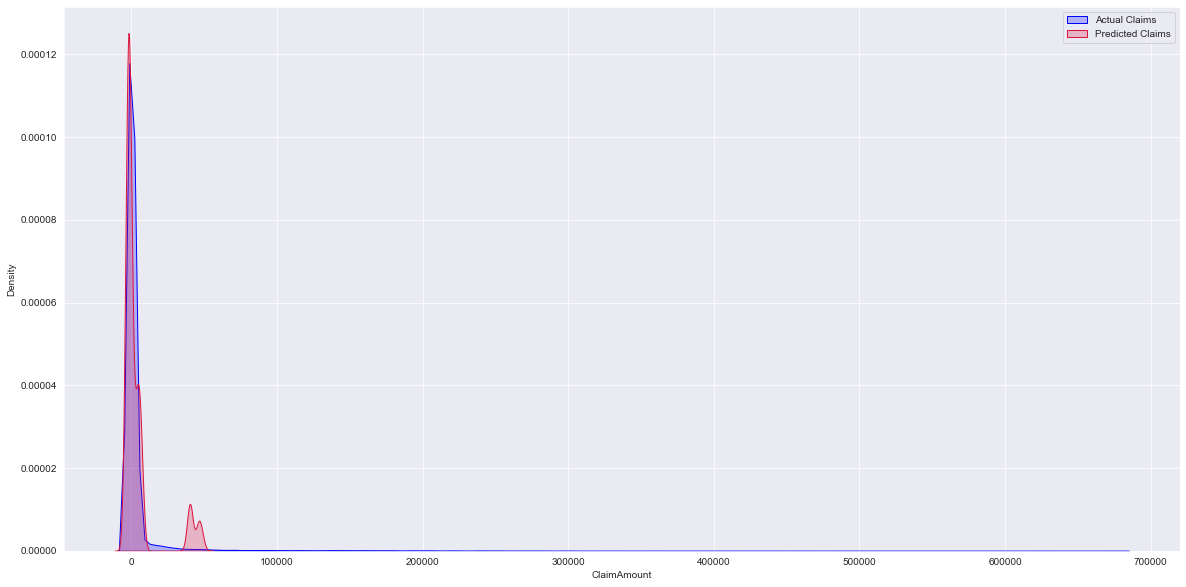

In [467]:
plt.figure(figsize=(20,10))
sns.set_style("darkgrid")
sns.kdeplot(y_val, color="blue", shade=True, label="Actual Claims")
sns.kdeplot(y_val_pred, color="crimson", shade=True, label="Predicted Claims")

plt.legend() 
plt.show()

## XGBoost (Extreme Gradient Boosting)

In [470]:
xgb_model = XGBRegressor()

In [472]:
# # Train the model on the training set
# xgb_model.fit(X_train, y_train)

**ValueError: feature_names must be string, and may not contain [, ] or < ... I will need to clean the features